# 0. 패키지 로드

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings # warning 무시
warnings.filterwarnings("ignore")

%matplotlib inline

# titanic 데이터 불러오기

In [3]:
# # 코렙 데이터 불러오기기
# import io

# titanic_origin = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

# titanic_test_origin = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [4]:
# train 데이터 불러오기
titanic_origin = pd.read_csv("C:/python/datas/titanic/train.csv")
# test data 불러오기
titanic_test_origin = pd.read_csv("C:/python/datas/titanic/test.csv")

# 형태 파악
titanic_origin.shape, titanic_test_origin.shape

((916, 12), (393, 11))

In [5]:
titanic_origin.columns # feature data + target data

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
titanic_test_origin.columns # feature data

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [7]:
titanic_origin.passengerid.nunique()

916

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

predictors = titanic_origin
target = titanic_origin["survived"]
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, 
                                                  stratify = titanic_origin['survived'], random_state = 0)

# 1. EDA

## 각 컬럼별 정보

In [9]:
# passengerId: unique id number to each passenger
# survived: passenger survive(1) or died(0)
# pclass: passenger class
# name: name
# gender: gender of passenger
# age: age of passenger
# sibsp: number of siblings/spouses
# parch: number of parents/children
# ticket: ticket number
# fare: amount of money spent on ticket
# cabin: cabin category
# embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

## 컬럼 데이터 파악

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 2 to 671
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  732 non-null    int64  
 1   survived     732 non-null    int64  
 2   pclass       732 non-null    int64  
 3   name         732 non-null    object 
 4   gender       732 non-null    object 
 5   age          585 non-null    float64
 6   sibsp        732 non-null    int64  
 7   parch        732 non-null    int64  
 8   ticket       732 non-null    object 
 9   fare         732 non-null    float64
 10  cabin        170 non-null    object 
 11  embarked     731 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 74.3+ KB


In [11]:
X_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age            147
sibsp            0
parch            0
ticket           0
fare             0
cabin          562
embarked         1
dtype: int64

In [12]:
X_val.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
gender           0
age             33
sibsp            0
parch            0
ticket           0
fare             0
cabin          156
embarked         0
dtype: int64

In [13]:
titanic_test_origin.isnull().sum()

passengerid      0
pclass           0
name             0
gender           0
age             83
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
dtype: int64

## 필요한 컬럼 파악

### 수치형 데이터 정보 파악

In [14]:
X_train.describe(include = np.number)

,passengerid,survived,pclass,age,sibsp,parch,fare
count,732.000000,732.000000,732.000000,585.000000,732.000000,732.000000,732.000000
mean,461.659836,0.377049,2.273224,29.792171,0.509563,0.364754,31.504758
std,267.149533,0.484979,0.842895,14.188681,1.064881,0.831667,45.917984
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,229.750000,0.000000,1.000000,21.000000,0.000000,0.000000,7.917700
50%,470.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,696.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.000000
max,914.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### pclass 분석

In [15]:
pd.crosstab(X_train.pclass,X_train.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,84,103,187
2,93,65,158
3,279,108,387
All,456,276,732


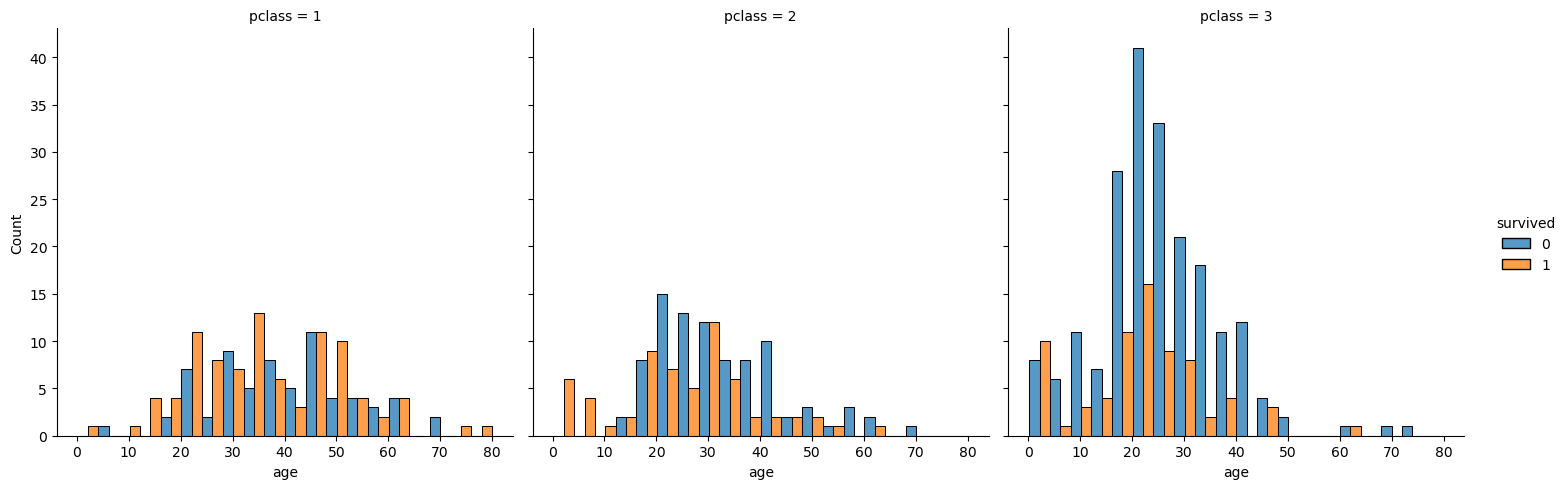

In [16]:
sns.displot(X_train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass")

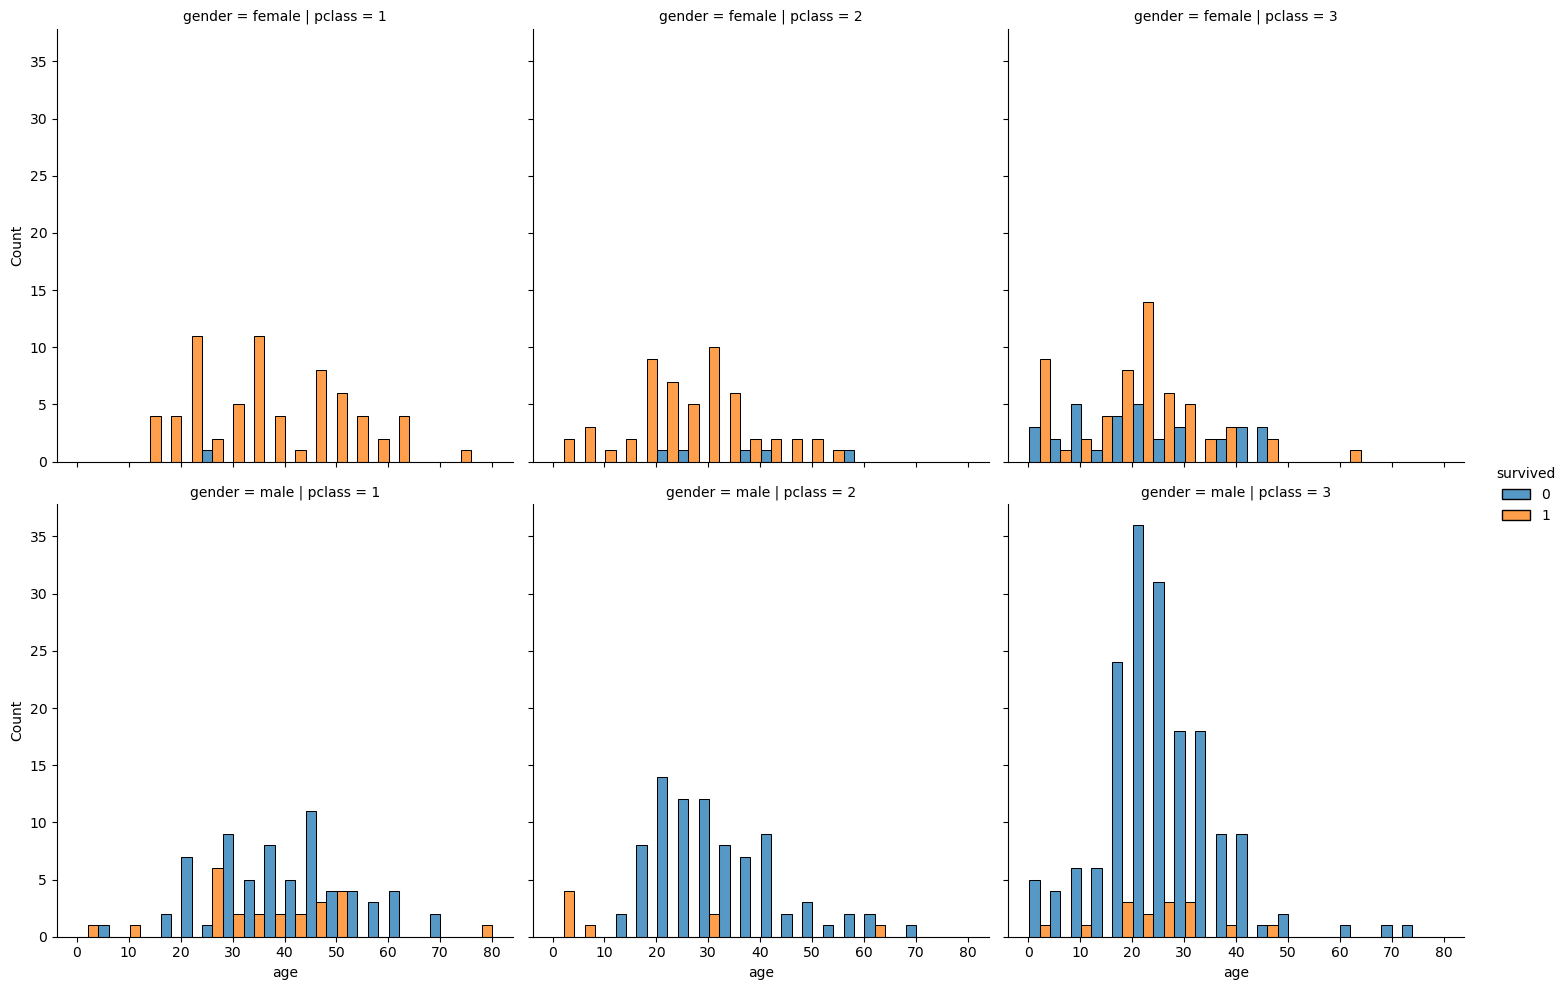

In [17]:
sns.displot(X_train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass", row='gender')

# 여자이면서 pclass가 1인 경우 모든 여성이 살았다.

#### Age 분석

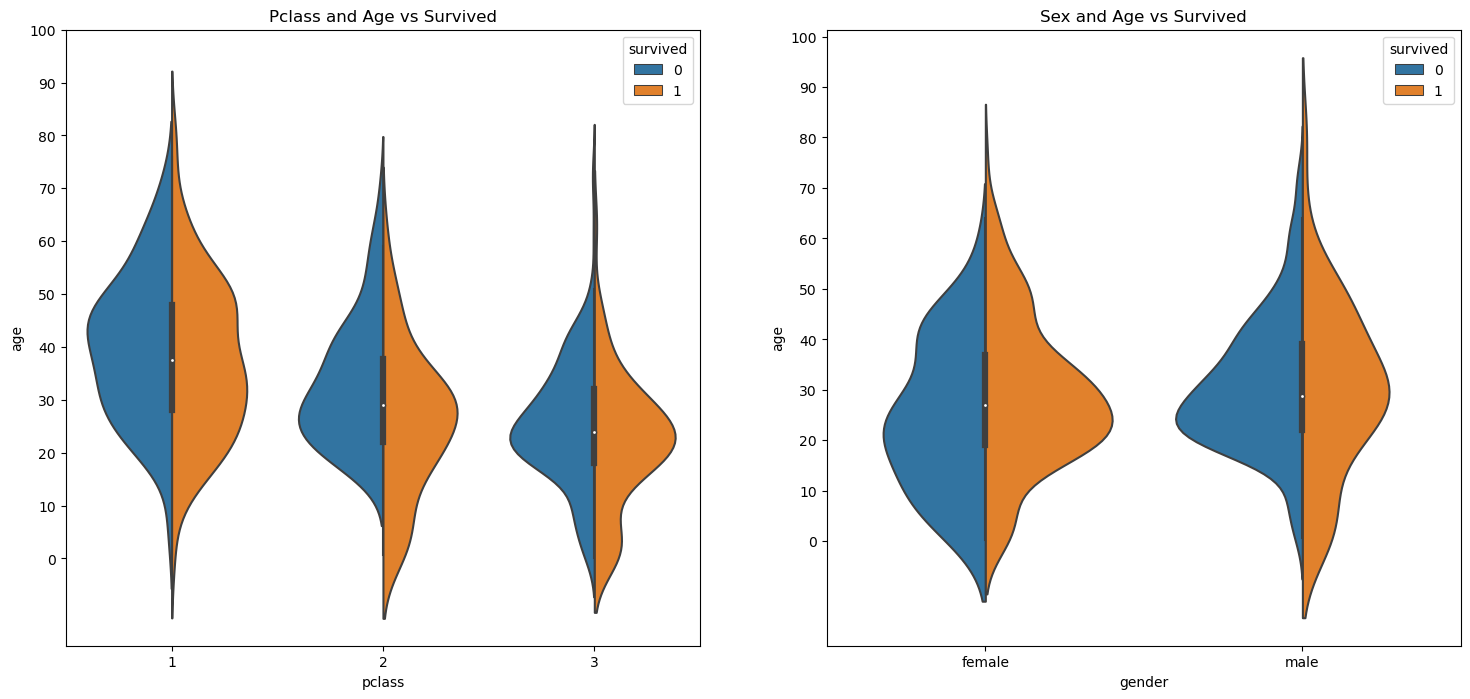

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("pclass","age", hue="survived", data=X_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="survived", data=X_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

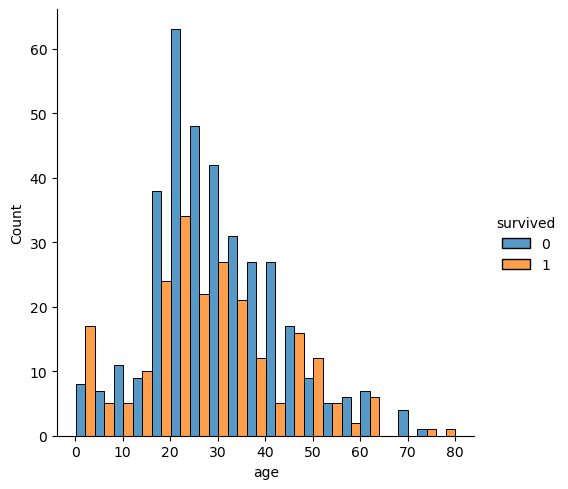

In [19]:
sns.displot(X_train, x='age', hue="survived", multiple="dodge", bins=20)

# 0살~5살 미만 정도의 어린 아이만 다른 모든 세대와 달리 산 사람의 비율이 높다.

In [20]:
check1 = X_train['age'] <= 5
X_train.loc[check1]['survived'].mean()

0.6666666666666666

In [21]:
check1 = X_train['age'] <= 10
check2 = X_train['age'] > 5
check = check1 & check2
X_train.loc[check]['survived'].mean()

# 5~10살 사이는 생존율이 전체 생존율과 비슷함

0.3

In [22]:
check1 = X_train['age'] > 5
X_train.loc[check1]['survived'].mean()

0.3709677419354839

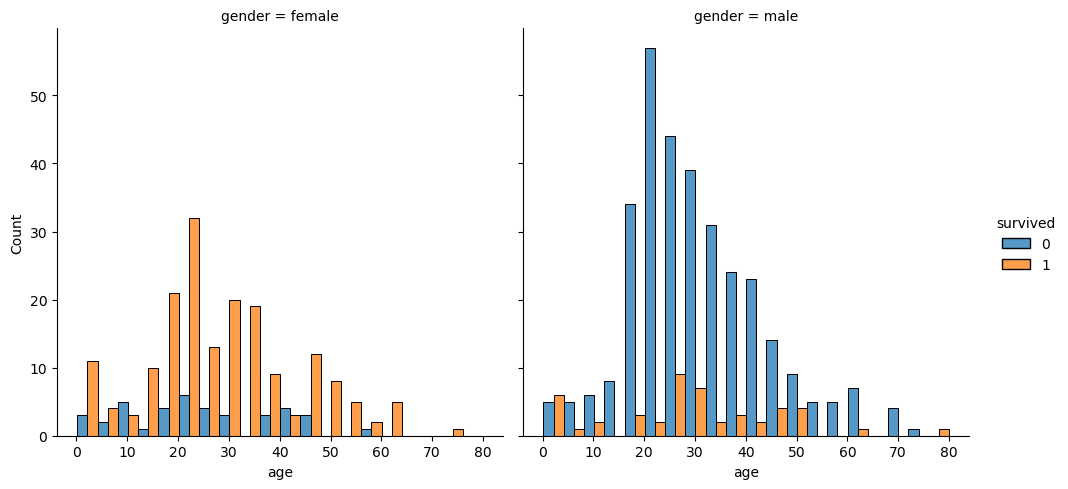

In [23]:
sns.displot(X_train, x="age", hue="survived", multiple="dodge", bins=20, col="gender")

### 문자형 데이터 정보 파악

In [24]:
X_train.describe(exclude = np.number)

,name,gender,ticket,cabin,embarked
count,732,732,732,170,731
unique,731,2,591,132,3
top,"Connolly, Miss. Kate",male,CA. 2343,G6,S
freq,2,466,7,4,523


#### gender 분석

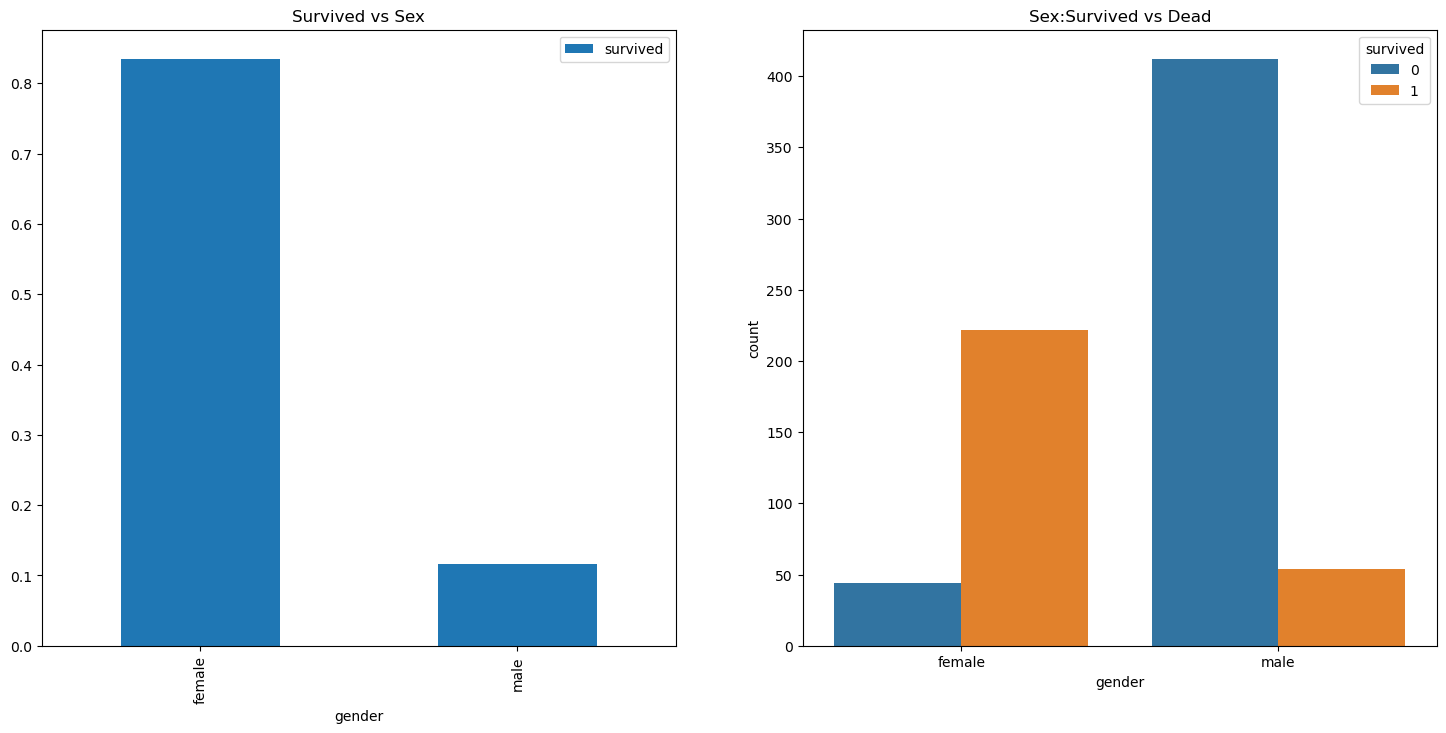

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
X_train[['gender','survived']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('gender',hue='survived',data=X_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Initial 추출(Mr, Miss, 등)

In [26]:

#     'Mr.': '남성',
#     'Master.': '남성',
#     'Sir.': '남성',
#     'Miss.': '미혼 여성',
#     'Mrs.': '기혼 여성',
#     'Ms.': '미혼/기혼 여성',
#     'Lady.': '숙녀',
#     'Mlle.': '아가씨',
#     # 직업
#     'Dr.': '의사',
#     'Rev.': '목사',
#     'Major.': '계급',
#     'Don.': '교수',
#     'Col.': '군인',
#     'Capt.': '군인',
#     # 귀족
#     'Mme.': '영부인',
#     'Countess.': '백작부인',
#     'Jonkheer.': '귀족'

In [27]:
# it looks for strings which lie between A-Z or a-z and followed by a .(dot).

for df in [X_train, X_val, titanic_test_origin]:
    df['initial']=df.name.str.extract('([A-Za-z]+)\.') # extract the Salutations



In [28]:
pd.crosstab(X_train.initial,X_train.gender).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Major,Master,Miss,Mr,Mrs,Ms,Rev,Sir
gender,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,151,0,112,1,0,0
male,1,3,0,1,4,1,2,30,0,417,0,0,6,1


In [29]:
X_train.initial.value_counts()

Mr          417
Miss        151
Mrs         112
Master       30
Rev           6
Dr            5
Col           3
Major         2
Capt          1
Sir           1
Don           1
Ms            1
Jonkheer      1
Countess      1
Name: initial, dtype: int64

In [30]:
# initial 값을 Miss, Mr, Mrs, Mrs, Other로 통일
X_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

X_val['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

titanic_test_origin['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [31]:
X_train.initial.value_counts()

Mr        427
Miss      152
Mrs       113
Master     30
Other      10
Name: initial, dtype: int64

#### Embarked 분석

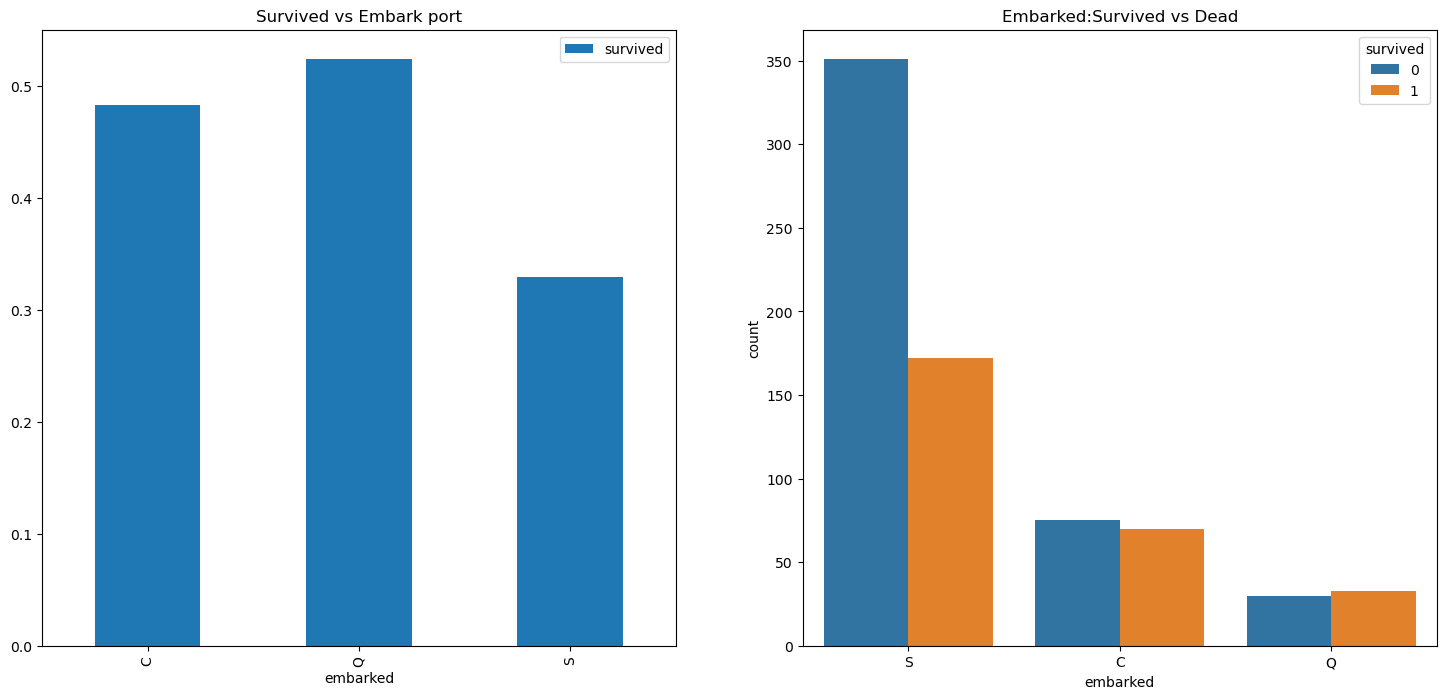

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
X_train[['embarked','survived']].groupby(['embarked']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Embark port')
sns.countplot('embarked',hue='survived',data=X_train,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

##### embarked 데이터 채우기

In [33]:
# 범주 별 빈도 수 확인
X_train['embarked'].value_counts(dropna=False)

S      523
C      145
Q       63
NaN      1
Name: embarked, dtype: int64

In [34]:
print(f"before : {X_train['embarked'].isnull().sum()}, {X_val['embarked'].isnull().sum()}, {titanic_test_origin['embarked'].isnull().sum()}")
# 최빈값
embarked_mode = X_train['embarked'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 'S' 반환 가능)

# NA imputation
X_train['embarked'] = X_train['embarked'].fillna(embarked_mode)
X_val['embarked'] = X_val['embarked'].fillna(embarked_mode)
titanic_test_origin['embarked'] = titanic_test_origin['embarked'].fillna(embarked_mode)
# train의 최빈값을 train,test에 모두 채워준다.

# 확인
print(f"after : {X_train['embarked'].isnull().sum()}, {X_val['embarked'].isnull().sum()}, {titanic_test_origin['embarked'].isnull().sum()}")

before : 1, 0, 1
after : 0, 0, 0


## gender와 embark값 수치형으로 전환

In [35]:
X_train.loc[X_train["gender"] == 'male', 'gender'] = 0
X_train.loc[X_train["gender"] == 'female', 'gender'] = 1

X_val.loc[X_val["gender"] == 'male', 'gender'] = 0
X_val.loc[X_val["gender"] == 'female', 'gender'] = 1

titanic_test_origin.loc[titanic_test_origin["gender"] == 'male', 'gender'] = 0
titanic_test_origin.loc[titanic_test_origin["gender"] == 'female', 'gender'] = 1


X_train.loc[X_train["embarked"] == 'S', 'embarked'] = 0
X_train.loc[X_train["embarked"] == 'C', 'embarked'] = 1
X_train.loc[X_train["embarked"] == 'Q', 'embarked'] = 2

X_val.loc[X_val["embarked"] == 'S', 'embarked'] = 0
X_val.loc[X_val["embarked"] == 'C', 'embarked'] = 1
X_val.loc[X_val["embarked"] == 'Q', 'embarked'] = 2

titanic_test_origin.loc[titanic_test_origin["embarked"] == 'S', 'embarked'] = 0
titanic_test_origin.loc[titanic_test_origin["embarked"] == 'C', 'embarked'] = 1
titanic_test_origin.loc[titanic_test_origin["embarked"] == 'Q', 'embarked'] = 2

In [36]:
X_train.gender = X_train.gender.astype('int64')
X_train.embarked = X_train.embarked.astype('int64')

X_val.gender = X_val.gender.astype('int64')
X_val.embarked = X_val.embarked.astype('int64')

titanic_test_origin.gender = titanic_test_origin.gender.astype('int64')
titanic_test_origin.embarked = titanic_test_origin.embarked.astype('int64')

#### Cabin 분석

In [37]:
# pd.set_option('display.max_rows', None)

df = X_train.copy()
_df = df[['cabin', 'survived']].dropna()
_df

,cabin,survived
2,B69,1
640,B57 B59 B63 B66,1
636,B22,0
655,E50,1
679,B45,1
...,...,...
539,C124,0
839,C92,1
336,D35,1
128,D33,1


In [38]:
die = df[df.survived == 0].dropna(subset=['cabin'])
die

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial
636,636,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,B22,0,Mr
422,422,0,1,"Colley, Mr. Edward Pomeroy",0,47.0,0,0,5727,25.5875,E58,0,Mr
668,668,0,1,"Graham, Mr. George Edward",0,38.0,0,1,PC 17582,153.4625,C91,0,Mr
287,287,0,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,0,Mr
517,517,0,1,"Astor, Col. John Jacob",0,47.0,1,0,PC 17757,227.5250,C62 C64,1,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,0,1,"Dodge, Dr. Washington",0,53.0,1,1,33638,81.8583,A34,0,Mr
525,525,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,1,Mr
131,131,0,1,"Gee, Mr. Arthur H",0,47.0,0,0,111320,38.5000,E63,0,Mr
898,898,0,1,"Keeping, Mr. Edwin",0,32.5,0,0,113503,211.5000,C132,1,Mr


In [39]:
alive = df[df.survived == 1].dropna(subset=['cabin'])
alive

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,initial
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",1,52.0,1,1,12749,93.5000,B69,0,Mrs
640,640,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1,Mrs
655,655,1,1,"Harder, Mr. George Achilles",0,25.0,1,0,11765,55.4417,E50,1,Mr
679,679,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,0,Mrs
218,218,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,0,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,1,1,"Goldenberg, Mr. Samuel L",0,49.0,1,0,17453,89.1042,C92,1,Mr
839,839,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,NaN,1,0,17453,89.1042,C92,1,Mrs
336,336,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,0,Mrs
128,128,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.0,1,0,PC 17572,76.7292,D33,1,Mrs


In [40]:
no_cabin = df[df.cabin.isnull()].survived.value_counts()
no_cabin

0    385
1    177
Name: survived, dtype: int64

# ★ Basic Model

In [41]:
# 중복제거
print(f'before: {X_train.shape}')
X_train.drop_duplicates(keep='first', inplace=True, ignore_index=True)
X_val.drop_duplicates(keep='first', inplace=True, ignore_index=True)
titanic_test_origin.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(f'after: {X_train.shape}')

# drop_duplicates 적용 전ㆍ후 차이가 없으므로 중복행이 없다는 것을 알 수 있다.

before: (732, 13)
after: (732, 13)


In [42]:
X_tr = X_train.copy()
X_te = X_val.copy()
test = titanic_test_origin.copy()

## 2. Data Cleaning

In [43]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'initial'],
      dtype='object')

In [44]:
X_te.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'initial'],
      dtype='object')

In [45]:
test.columns

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'initial'],
      dtype='object')

In [46]:
# name, ticket, cabin, initial 제외하고 분석
X_tr = X_tr.drop(labels = ["name", "ticket", "cabin", "initial"], axis = 1)
X_te = X_te.drop(labels = ["name", "ticket", "cabin", "initial"], axis = 1)
test = test.drop(labels = ["name", "ticket", "cabin", "initial"], axis = 1)

## 결측치 파악 및 처리

In [47]:
X_tr.isnull().sum()

passengerid      0
survived         0
pclass           0
gender           0
age            147
sibsp            0
parch            0
fare             0
embarked         0
dtype: int64

In [48]:
X_te.isnull().sum()

passengerid     0
survived        0
pclass          0
gender          0
age            33
sibsp           0
parch           0
fare            0
embarked        0
dtype: int64

In [49]:
test.isnull().sum()

passengerid     0
pclass          0
gender          0
age            83
sibsp           0
parch           0
fare            1
embarked        0
dtype: int64

In [50]:
# train data fare 확인
X_tr['fare'].value_counts(dropna=False)

8.0500     37
13.0000    36
26.0000    32
7.7500     27
7.8958     23
           ..
22.0250     1
19.5000     1
7.1250      1
8.5167      1
38.5000     1
Name: fare, Length: 232, dtype: int64

In [51]:
# 최빈값
fare_mode = X_tr['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# NA imputation
test['fare'] = test['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(test['fare'].isnull().sum())

0


### age 결측치 채우기

In [52]:
# X_tr 결측치
print(f"before : {X_tr[['age']].isnull().sum().sum()}")
X_tr['age'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
random_sampling.index = X_tr[lambda x: x['age'].isnull()].index # index 부여
# 결측치가 있는 자리의 인덱스 추출

# NA imputation
X_tr.loc[X_tr['age'].isnull(), 'age'] = random_sampling

# 확인
print(f"after : {X_tr[['age']].isnull().sum().sum()}")

before : 147
after : 0


In [53]:
# X_te 결측치
print(f"before : {X_te[['age']].isnull().sum().sum()}")
X_te['age'] = X_te['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_te['age'].isnull().sum()))
random_sampling.index = X_te[lambda x: x['age'].isnull()].index # index 부여
# 결측치가 있는 자리의 인덱스 추출

# NA imputation
X_te.loc[X_te['age'].isnull(), 'age'] = random_sampling

# 확인
print(f"after : {X_te[['age']].isnull().sum().sum()}")

before : 33
after : 0


In [54]:
# test 결측치
print(f"before : {test[['age']].isnull().sum().sum()}")
test['age'] = test['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(test['age'].isnull().sum()))
random_sampling.index = test[lambda x: x['age'].isnull()].index # index 부여
# 결측치가 있는 자리의 인덱스 추출

# NA imputation
test.loc[test['age'].isnull(), 'age'] = random_sampling

# 확인
print(f"after : {test[['age']].isnull().sum().sum()}")

before : 83
after : 0


In [55]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  732 non-null    int64  
 1   survived     732 non-null    int64  
 2   pclass       732 non-null    int64  
 3   gender       732 non-null    int64  
 4   age          732 non-null    float64
 5   sibsp        732 non-null    int64  
 6   parch        732 non-null    int64  
 7   fare         732 non-null    float64
 8   embarked     732 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.6 KB


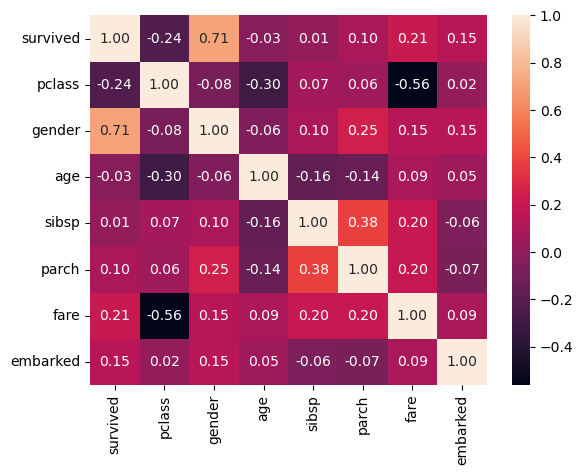

In [56]:
list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked']
sns.heatmap(X_tr[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## 3. Machine Learning

In [57]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'gender', 'age', 'sibsp', 'parch',
       'fare', 'embarked'],
      dtype='object')

In [58]:
test.columns

Index(['passengerid', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [59]:
X_tr = X_tr.drop(['survived', 'passengerid'], axis=1)
X_te = X_te.drop(['survived', 'passengerid'], axis=1)
X_tr

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,1,52.0,1,1,93.5000,0
1,3,0,17.0,0,0,7.2292,1
2,1,0,45.0,0,0,26.5500,0
3,1,1,48.0,1,3,262.3750,1
4,1,0,70.0,1,1,71.0000,0
...,...,...,...,...,...,...,...
727,1,1,30.0,0,0,110.8833,1
728,1,1,49.0,1,0,76.7292,1
729,2,1,44.0,1,0,26.0000,0
730,1,0,48.0,1,0,76.7292,1


In [60]:
X_tr.shape, X_te.shape, y_train.shape, y_val.shape

((732, 7), (184, 7), (732,), (184,))

In [61]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_tr, y_train)
y_pred = gaussian.predict(X_te)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_tr, y_train)
y_pred = logreg.predict(X_te)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr, y_train)
y_pred = svc.predict(X_te)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_tr, y_train)
y_pred = linear_svc.predict(X_te)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_tr, y_train)
y_pred = perceptron.predict(X_te)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr, y_train)
y_pred = decisiontree.predict(X_te)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_tr, y_train)
y_pred = randomforest.predict(X_te)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_tr, y_train)
y_pred = sgd.predict(X_te)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_tr, y_train)
y_pred = gbk.predict(X_te)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.15
------------------------------
Logistic Regression : 83.7
------------------------------
Support Vector Machines : 64.67
------------------------------
Linear SVC : 69.57
------------------------------
Perceptron : 67.93
------------------------------
Decision Tree : 81.52
------------------------------
Random Forest : 80.98
------------------------------
KNN or k-Nearest Neighbors : 59.78
------------------------------
Stochastic Gradient Descent : 80.98
------------------------------
Gradient Boosting Classifier : 84.24


#### Synthesis Model results(모델별 결과 종합)

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.24
2,Logistic Regression,83.70
4,Naive Bayes,83.15
7,Decision Tree,81.52
3,Random Forest,80.98
8,Stochastic Gradient Descent,80.98
6,Linear SVC,69.57
5,Perceptron,67.93
0,Support Vector Machines,64.67
1,KNN,59.78


### Predict and Save

In [63]:
# basic model

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = logreg.predict(test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_basic_submission_logreg.csv', index=False)

In [64]:
# basic model random forest

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = randomforest.predict(test.drop('passengerid', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_basic_submission_randomforest.csv', index=False)

# ★ Model 1 (initial별 최빈값을 age에 대입)

In [65]:
X_tr = X_train.copy()
X_te = X_val.copy()
test = titanic_test_origin.copy()

In [66]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'initial'],
      dtype='object')

In [67]:
# train data fare 확인
X_tr['fare'].value_counts(dropna=False)

8.0500     37
13.0000    36
26.0000    32
7.7500     27
7.8958     23
           ..
22.0250     1
19.5000     1
7.1250      1
8.5167      1
38.5000     1
Name: fare, Length: 232, dtype: int64

In [68]:
# 최빈값
fare_mode = X_tr['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# NA imputation
test['fare'] = test['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(test['fare'].isnull().sum())

0


In [69]:
# name, ticket, cabin, initial 제외하고 분석
X_tr = X_tr.drop(labels = ["name", "ticket", "cabin"], axis = 1)
X_te = X_te.drop(labels = ["name", "ticket", "cabin"], axis = 1)
test = test.drop(labels = ["name", "ticket", "cabin"], axis = 1)

In [70]:
X_tr.groupby('initial').age.apply(pd.Series.mode)

initial   
Master   0     2.0
         1     9.0
Miss     0    18.0
         1    22.0
Mr       0    21.0
Mrs      0    45.0
Other    0    28.0
         1    30.0
         2    38.0
         3    41.0
         4    42.0
         5    47.0
         6    51.0
         7    53.0
         8    54.0
         9    60.0
Name: age, dtype: float64

In [71]:
## Assigning the NaN Values with the Ceil values of the mean ages

# 값이 여러개일 경우 평균으로 지정
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mr'),'age']=21
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mrs'),'age']=45
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Master'),'age']=5
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Miss'),'age']=20
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Other'),'age']=44

X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mr'),'age']=21
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mrs'),'age']=45
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Master'),'age']=5
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Miss'),'age']=20
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Other'),'age']=44


test.loc[(test.age.isnull())&(test.initial=='Mr'),'age']=21
test.loc[(test.age.isnull())&(test.initial=='Mrs'),'age']=45
test.loc[(test.age.isnull())&(test.initial=='Master'),'age']=5
test.loc[(test.age.isnull())&(test.initial=='Miss'),'age']=20
test.loc[(test.age.isnull())&(test.initial=='Other'),'age']=44

In [72]:
X_tr.age.isnull().sum().sum(), X_te.age.isnull().sum().sum(), test.age.isnull().sum().sum()

(0, 0, 0)

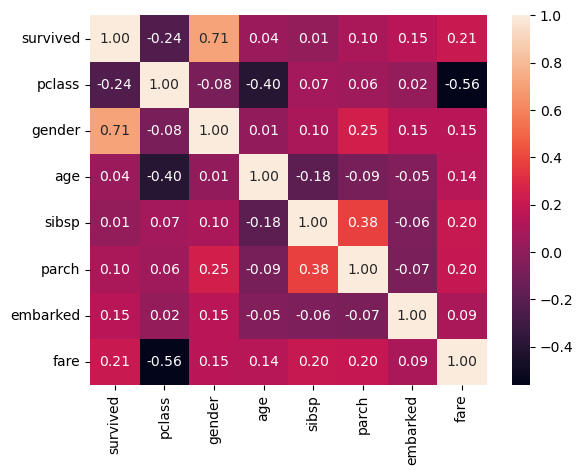

In [73]:
list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'embarked', 'fare']
sns.heatmap(X_tr[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## 3. Machine Learning

In [74]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'gender', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'initial'],
      dtype='object')

In [75]:
test.columns

Index(['passengerid', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'initial'],
      dtype='object')

In [76]:
X_tr = X_tr.drop(['survived', 'passengerid', 'initial'], axis=1)
X_te = X_te.drop(['survived', 'passengerid', 'initial'], axis=1)
test = test.drop('initial', axis = 1)
X_tr

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,1,52.0,1,1,93.5000,0
1,3,0,21.0,0,0,7.2292,1
2,1,0,45.0,0,0,26.5500,0
3,1,1,48.0,1,3,262.3750,1
4,1,0,70.0,1,1,71.0000,0
...,...,...,...,...,...,...,...
727,1,1,20.0,0,0,110.8833,1
728,1,1,49.0,1,0,76.7292,1
729,2,1,44.0,1,0,26.0000,0
730,1,0,48.0,1,0,76.7292,1


In [77]:
X_tr.shape, X_te.shape, y_train.shape, y_val.shape

((732, 7), (184, 7), (732,), (184,))

In [78]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_tr, y_train)
y_pred = gaussian.predict(X_te)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_tr, y_train)
y_pred = logreg.predict(X_te)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr, y_train)
y_pred = svc.predict(X_te)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_tr, y_train)
y_pred = linear_svc.predict(X_te)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_tr, y_train)
y_pred = perceptron.predict(X_te)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr, y_train)
y_pred = decisiontree.predict(X_te)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_tr, y_train)
y_pred = randomforest.predict(X_te)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_tr, y_train)
y_pred = sgd.predict(X_te)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_tr, y_train)
y_pred = gbk.predict(X_te)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.15
------------------------------
Logistic Regression : 83.7
------------------------------
Support Vector Machines : 64.13
------------------------------
Linear SVC : 66.85
------------------------------
Perceptron : 75.0
------------------------------
Decision Tree : 79.35
------------------------------
Random Forest : 79.89
------------------------------
KNN or k-Nearest Neighbors : 59.78
------------------------------
Stochastic Gradient Descent : 80.98
------------------------------
Gradient Boosting Classifier : 83.15


### Synthesis Model results(모델별 결과 종합)

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,83.70
4,Naive Bayes,83.15
9,Gradient Boosting Classifier,83.15
8,Stochastic Gradient Descent,80.98
3,Random Forest,79.89
7,Decision Tree,79.35
5,Perceptron,75.00
6,Linear SVC,66.85
0,Support Vector Machines,64.13
1,KNN,59.78


### Predict and Save

In [80]:
# Model1 (initial별 최빈값을 age에 대입)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = logreg.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 1_logreg.csv', index=False)

In [81]:
# Model1 (initial별 최빈값을 age에 대입) randomforest

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = randomforest.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 1_randomforest.csv', index=False)

# ★ Model 2 {(initial별 age + infant(영유아) + pclass}

## 1. EDA

### add infant

In [82]:
print("before :", X_train.shape, X_val.shape, titanic_test_origin.shape)
def add_infant(age):
  result = 0
  try:
    if age <= 5:
      result = 1
  except:
    pass
  return result # 영유아만 1, 나머지는 0으로 정리

X_train['infant'] = X_train['age'].map(lambda x: add_infant(x))
X_val['infant'] = X_val['age'].map(lambda x: add_infant(x))
titanic_test_origin['infant'] = titanic_test_origin['age'].map(lambda x: add_infant(x))

print(f"{X_train['infant'].nunique()} / \n {X_train['infant'].unique()} \n")
print("after :", X_train.shape, X_val.shape, titanic_test_origin.shape)

before : (732, 13) (184, 13) (393, 12)
2 / 
 [0 1] 

after : (732, 14) (184, 14) (393, 13)


In [83]:
X_train.infant.dtype

dtype('int64')

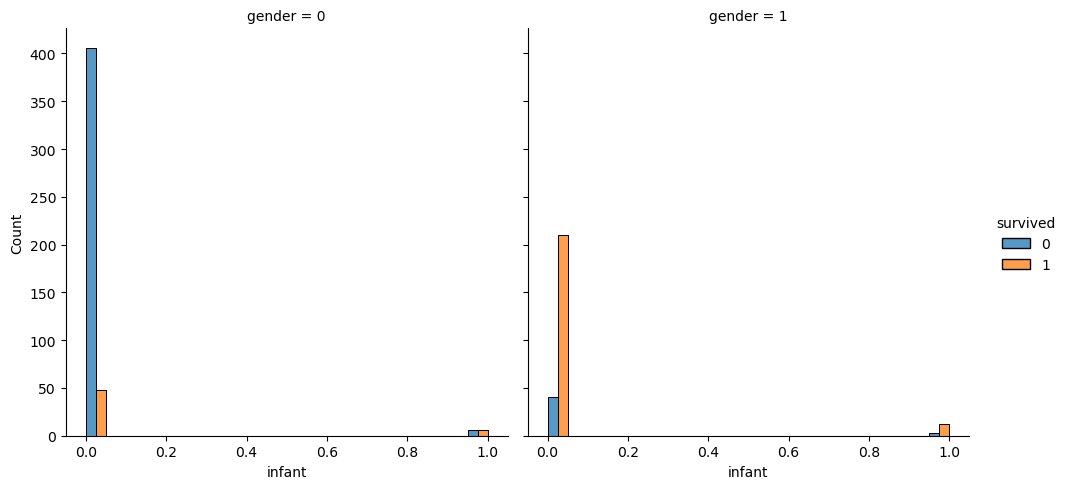

In [84]:
sns.displot(X_train, x="infant", hue="survived", multiple="dodge", bins=20, col="gender")

### add gender_infant

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  732 non-null    int64  
 1   survived     732 non-null    int64  
 2   pclass       732 non-null    int64  
 3   name         732 non-null    object 
 4   gender       732 non-null    int64  
 5   age          585 non-null    float64
 6   sibsp        732 non-null    int64  
 7   parch        732 non-null    int64  
 8   ticket       732 non-null    object 
 9   fare         732 non-null    float64
 10  cabin        170 non-null    object 
 11  embarked     732 non-null    int64  
 12  initial      732 non-null    object 
 13  infant       732 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 80.2+ KB


In [86]:
X_train['gender_infant'] = X_train.apply(lambda row: str(row['gender'])+'_'+str(row['infant']), axis=1)
X_val['gender_infant'] = X_val.apply(lambda row: str(row['gender'])+'_'+str(row['infant']), axis=1)
titanic_test_origin['gender_infant'] = titanic_test_origin.apply(lambda row: str(row['gender'])+'_'+str(row['infant']), axis=1)

print(f"{X_train['gender_infant'].nunique()} / \n {X_train['gender_infant'].unique()} \n")
X_train.shape, X_val.shape, titanic_test_origin.shape

4 / 
 ['1_0' '0_0' '1_1' '0_1'] 



((732, 15), (184, 15), (393, 14))

### add gender pclass

In [87]:
X_train['gender_pclass'] = X_train.apply(lambda row: str(row['gender'])+'_'+str(row['pclass']), axis=1)
X_val['gender_pclass'] = X_val.apply(lambda row: str(row['gender'])+'_'+str(row['pclass']), axis=1)
titanic_test_origin['gender_pclass'] = titanic_test_origin.apply(lambda row: str(row['gender'])+'_'+str(row['pclass']), axis=1)

print(f"{X_train['gender_pclass'].nunique()} / \n {X_train['gender_pclass'].unique()} \n")
X_train.shape, X_val.shape, titanic_test_origin.shape

6 / 
 ['1_1' '0_3' '0_1' '0_2' '1_2' '1_3'] 



((732, 16), (184, 16), (393, 15))

## Encoding

In [88]:
from sklearn.preprocessing import OneHotEncoder

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   passengerid    732 non-null    int64  
 1   survived       732 non-null    int64  
 2   pclass         732 non-null    int64  
 3   name           732 non-null    object 
 4   gender         732 non-null    int64  
 5   age            585 non-null    float64
 6   sibsp          732 non-null    int64  
 7   parch          732 non-null    int64  
 8   ticket         732 non-null    object 
 9   fare           732 non-null    float64
 10  cabin          170 non-null    object 
 11  embarked       732 non-null    int64  
 12  initial        732 non-null    object 
 13  infant         732 non-null    int64  
 14  gender_infant  732 non-null    object 
 15  gender_pclass  732 non-null    object 
dtypes: float64(2), int64(8), object(6)
memory usage: 91.6+ KB


In [89]:
enc_cols = ['gender_infant', 'gender_pclass']
print(f'len_enc_cols: {len(enc_cols)}')
encoder = OneHotEncoder() 
enc_dfs = []

for i, df in enumerate([X_train, X_val, titanic_test_origin]):
  if not i:
    _encoded = encoder.fit_transform(df[enc_cols])
  else:
    _encoded = encoder.transform(df[enc_cols])

  _encoded_df = pd.DataFrame(
    _encoded.toarray(), 
    columns = encoder.get_feature_names_out()
  )

  not_enc_cols = list(set(df.columns) - set(enc_cols))
  enc_dfs.append(
    pd.concat(
      [df[not_enc_cols].reset_index(drop=True), _encoded_df.reset_index(drop=True)]
      , axis=1
    ).reset_index(drop=True)
  )

X_train = enc_dfs[0]
X_val = enc_dfs[1]
titanic_test_origin = enc_dfs[2]

print(f'{X_train.isnull().sum().sum()} / {X_val.isnull().sum().sum()} / {titanic_test_origin.isnull().sum().sum()}')
X_train.shape, X_val.shape, titanic_test_origin.shape

len_enc_cols: 2
709 / 189 / 380


((732, 24), (184, 24), (393, 23))

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   passengerid        732 non-null    int64  
 3   gender             732 non-null    int64  
 4   parch              732 non-null    int64  
 5   survived           732 non-null    int64  
 6   pclass             732 non-null    int64  
 7   initial            732 non-null    object 
 8   infant             732 non-null    int64  
 9   cabin              170 non-null    object 
 10  fare               732 non-null    float64
 11  sibsp              732 non-null    int64  
 12  ticket             732 non-null    object 
 13  embarked           732 non-null    int64  
 14  gender_infant_0_0  732 non-null    float64
 15  gender_infant_0_1  732 non-null    float64
 16  gender_infant_1_0  732 non

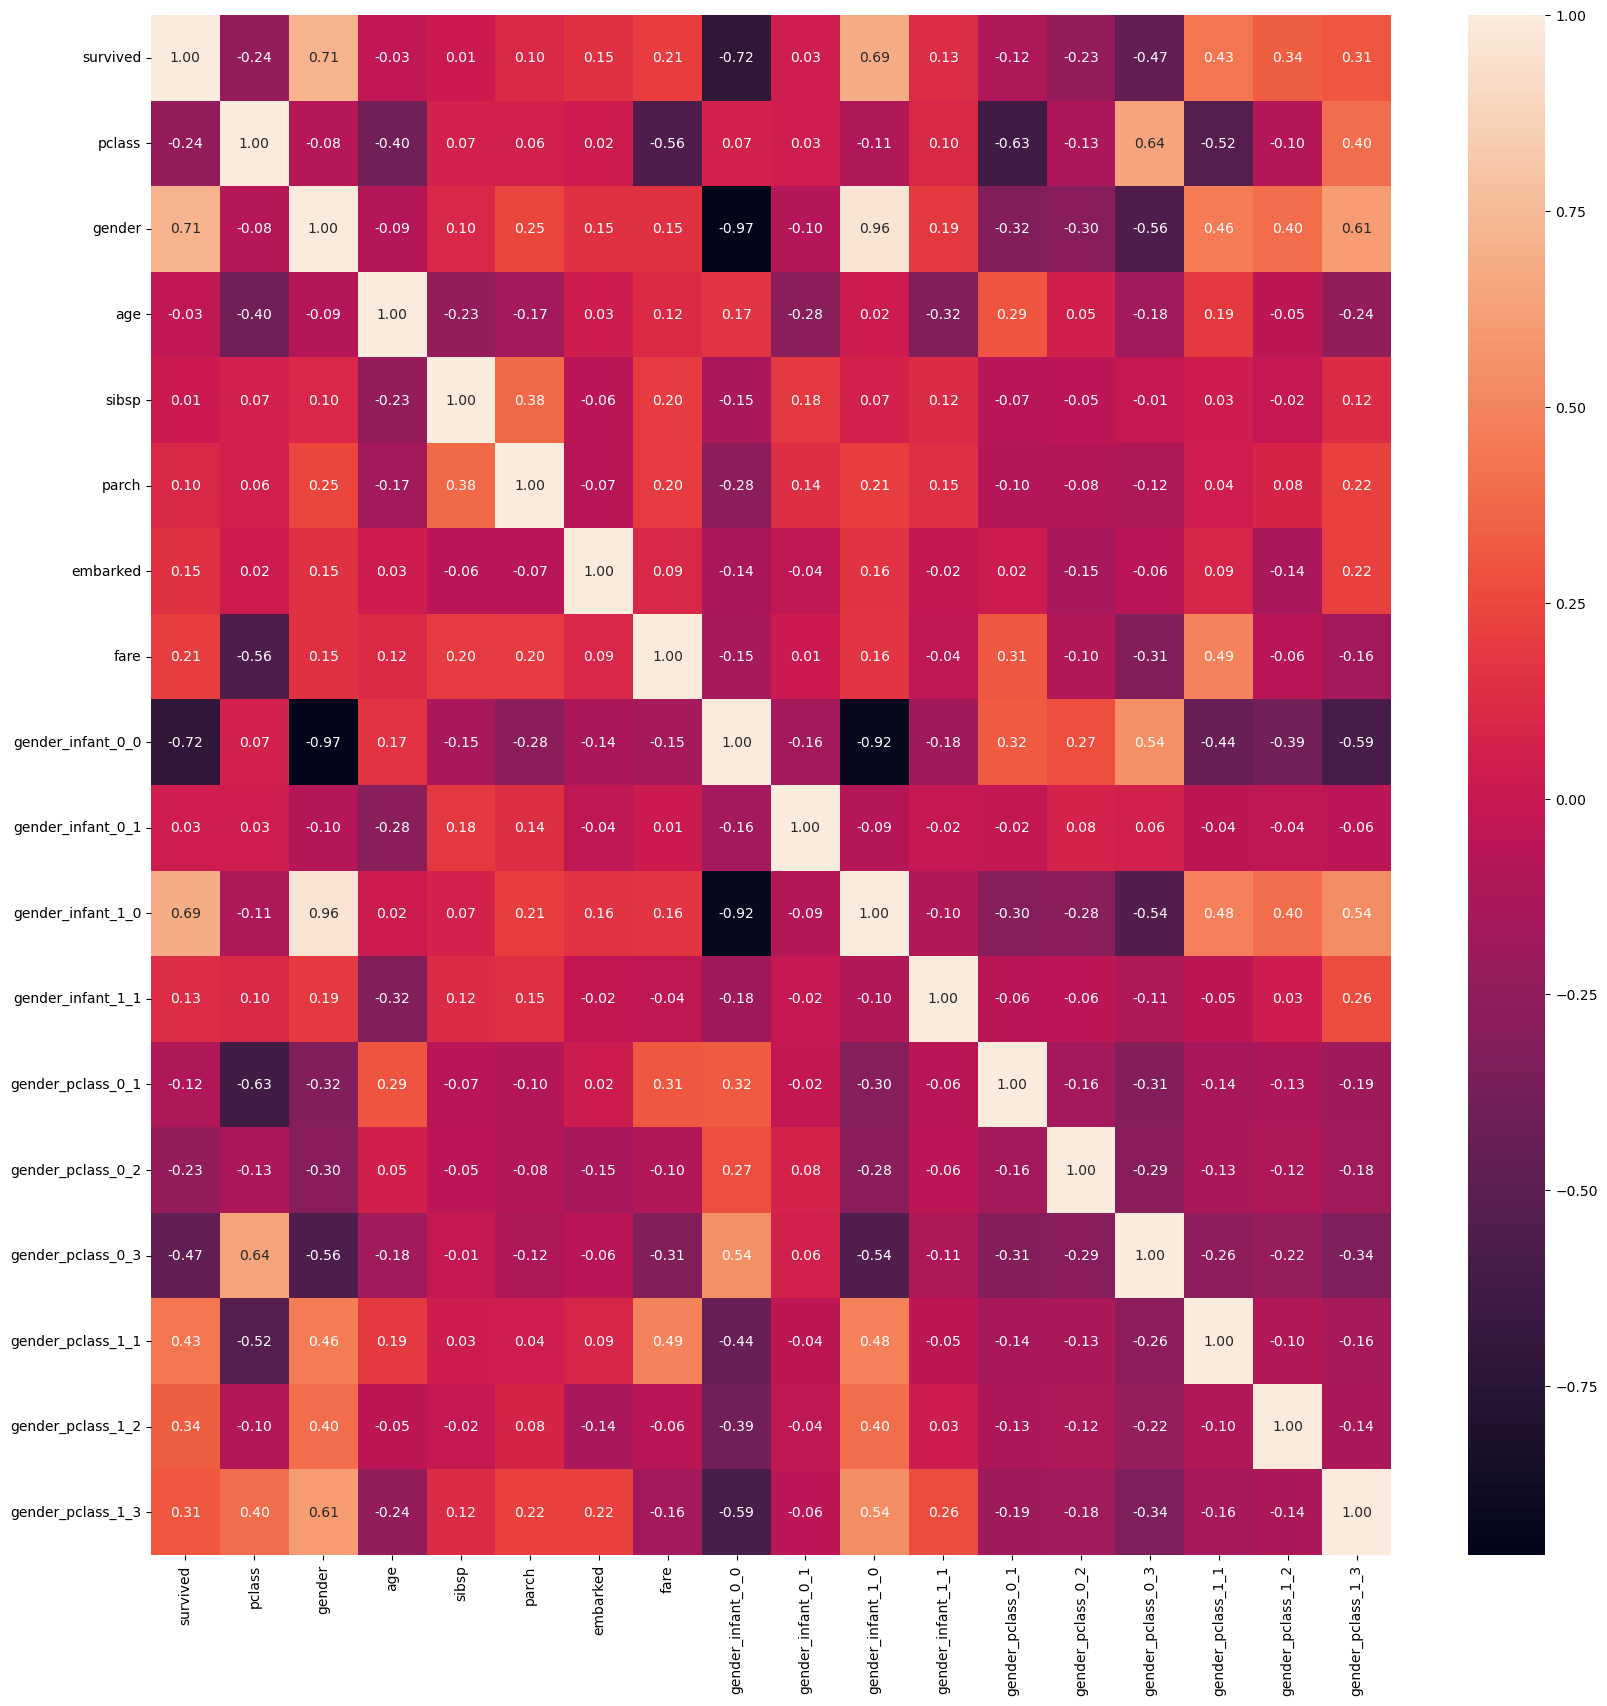

In [91]:
plt.figure(figsize = (20, 20))
list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'embarked', 'fare', 'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0',
          'gender_infant_1_1', 'gender_pclass_0_1', 'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1', 'gender_pclass_1_2', 'gender_pclass_1_3']
sns.heatmap(X_train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## Machine Learning

In [92]:
X_tr = X_train.copy()
X_te = X_val.copy()
test = titanic_test_origin.copy()

In [93]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   passengerid        732 non-null    int64  
 3   gender             732 non-null    int64  
 4   parch              732 non-null    int64  
 5   survived           732 non-null    int64  
 6   pclass             732 non-null    int64  
 7   initial            732 non-null    object 
 8   infant             732 non-null    int64  
 9   cabin              170 non-null    object 
 10  fare               732 non-null    float64
 11  sibsp              732 non-null    int64  
 12  ticket             732 non-null    object 
 13  embarked           732 non-null    int64  
 14  gender_infant_0_0  732 non-null    float64
 15  gender_infant_0_1  732 non-null    float64
 16  gender_infant_1_0  732 non

In [94]:
test.dtypes

initial               object
name                  object
age                  float64
infant                 int64
cabin                 object
passengerid            int64
fare                 float64
sibsp                  int64
ticket                object
gender                 int64
parch                  int64
embarked               int64
pclass                 int64
gender_infant_0_0    float64
gender_infant_0_1    float64
gender_infant_1_0    float64
gender_infant_1_1    float64
gender_pclass_0_1    float64
gender_pclass_0_2    float64
gender_pclass_0_3    float64
gender_pclass_1_1    float64
gender_pclass_1_2    float64
gender_pclass_1_3    float64
dtype: object

In [95]:
# 최빈값
fare_mode = X_tr['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# NA imputation
test['fare'] = test['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(test['fare'].isnull().sum())

0


In [96]:
## Assigning the NaN Values with the Ceil values of the mean ages

# 값이 여러개일 경우 평균으로 지정
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mr'),'age']=21
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mrs'),'age']=45
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Master'),'age']=5
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Miss'),'age']=20
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Other'),'age']=44

X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mr'),'age']=21
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mrs'),'age']=45
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Master'),'age']=5
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Miss'),'age']=20
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Other'),'age']=44


test.loc[(test.age.isnull())&(test.initial=='Mr'),'age']=21
test.loc[(test.age.isnull())&(test.initial=='Mrs'),'age']=45
test.loc[(test.age.isnull())&(test.initial=='Master'),'age']=5
test.loc[(test.age.isnull())&(test.initial=='Miss'),'age']=20
test.loc[(test.age.isnull())&(test.initial=='Other'),'age']=44

In [97]:
X_tr.age.isnull().sum().sum(), X_te.age.isnull().sum().sum(), test.age.isnull().sum().sum()

(0, 0, 0)

In [98]:
X_tr = X_tr.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
X_te = X_te.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
test = test.drop(['initial', 'name', 'ticket', 'cabin'], axis = 1)
X_tr

,age,gender,parch,pclass,infant,fare,sibsp,embarked,gender_infant_0_0,gender_infant_0_1,gender_infant_1_0,gender_infant_1_1,gender_pclass_0_1,gender_pclass_0_2,gender_pclass_0_3,gender_pclass_1_1,gender_pclass_1_2,gender_pclass_1_3
0,52.0,1,1,1,0,93.5000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,21.0,0,0,3,0,7.2292,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,45.0,0,0,1,0,26.5500,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,48.0,1,3,1,0,262.3750,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0,1,1,0,71.0000,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,20.0,1,0,1,0,110.8833,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
728,49.0,1,0,1,0,76.7292,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
729,44.0,1,0,2,0,26.0000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
730,48.0,0,0,1,0,76.7292,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X_tr.shape, X_te.shape, y_train.shape, y_val.shape

((732, 18), (184, 18), (732,), (184,))

In [100]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_tr, y_train)
y_pred = gaussian.predict(X_te)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_tr, y_train)
y_pred = logreg.predict(X_te)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr, y_train)
y_pred = svc.predict(X_te)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_tr, y_train)
y_pred = linear_svc.predict(X_te)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_tr, y_train)
y_pred = perceptron.predict(X_te)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr, y_train)
y_pred = decisiontree.predict(X_te)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_tr, y_train)
y_pred = randomforest.predict(X_te)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_tr, y_train)
y_pred = sgd.predict(X_te)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_tr, y_train)
y_pred = gbk.predict(X_te)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 82.07
------------------------------
Logistic Regression : 83.7
------------------------------
Support Vector Machines : 64.13
------------------------------
Linear SVC : 82.07
------------------------------
Perceptron : 84.78
------------------------------
Decision Tree : 77.72
------------------------------
Random Forest : 79.35
------------------------------
KNN or k-Nearest Neighbors : 64.67
------------------------------
Stochastic Gradient Descent : 78.8
------------------------------
Gradient Boosting Classifier : 83.15


### Synthesis Model results(모델별 결과 종합)

In [101]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Perceptron,84.78
2,Logistic Regression,83.70
9,Gradient Boosting Classifier,83.15
4,Naive Bayes,82.07
6,Linear SVC,82.07
3,Random Forest,79.35
8,Stochastic Gradient Descent,78.80
7,Decision Tree,77.72
1,KNN,64.67
0,Support Vector Machines,64.13


### Predict and Save

In [102]:
X_tr.columns

Index(['age', 'gender', 'parch', 'pclass', 'infant', 'fare', 'sibsp',
       'embarked', 'gender_infant_0_0', 'gender_infant_0_1',
       'gender_infant_1_0', 'gender_infant_1_1', 'gender_pclass_0_1',
       'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1',
       'gender_pclass_1_2', 'gender_pclass_1_3'],
      dtype='object')

In [103]:
test.columns

Index(['age', 'infant', 'passengerid', 'fare', 'sibsp', 'gender', 'parch',
       'embarked', 'pclass', 'gender_infant_0_0', 'gender_infant_0_1',
       'gender_infant_1_0', 'gender_infant_1_1', 'gender_pclass_0_1',
       'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1',
       'gender_pclass_1_2', 'gender_pclass_1_3'],
      dtype='object')

In [104]:
test = test[['parch', 'fare', 'pclass', 'embarked', 'gender', 'age', 'infant',
       'sibsp', 'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0',
       'gender_infant_1_1', 'gender_pclass_0_1', 'gender_pclass_0_2',
       'gender_pclass_0_3', 'gender_pclass_1_1', 'gender_pclass_1_2',
       'gender_pclass_1_3', 'passengerid']]
test.columns

Index(['parch', 'fare', 'pclass', 'embarked', 'gender', 'age', 'infant',
       'sibsp', 'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0',
       'gender_infant_1_1', 'gender_pclass_0_1', 'gender_pclass_0_2',
       'gender_pclass_0_3', 'gender_pclass_1_1', 'gender_pclass_1_2',
       'gender_pclass_1_3', 'passengerid'],
      dtype='object')

In [105]:
test.isnull().sum()

parch                0
fare                 0
pclass               0
embarked             0
gender               0
age                  0
infant               0
sibsp                0
gender_infant_0_0    0
gender_infant_0_1    0
gender_infant_1_0    0
gender_infant_1_1    0
gender_pclass_0_1    0
gender_pclass_0_2    0
gender_pclass_0_3    0
gender_pclass_1_1    0
gender_pclass_1_2    0
gender_pclass_1_3    0
passengerid          0
dtype: int64

In [106]:
# Model2 (initial별 최빈값을 age에 대입 + infant + pclass)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = randomforest.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 2_randomforest.csv', index=False)

In [107]:
# # 코렙 저장

# from google.colab import drive
# drive.mount('/content/data')

In [108]:
# # Model2 (initial별 최빈값을 age에 대입 + infant + pclass)

# #set ids as PassengerId and predict survival 
# ids = test['passengerid']
# predictions = randomforest.predict(test.drop('passengerid' , axis=1))

# #set the output as a dataframe and convert to csv file named submission.csv
# output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
# output.to_csv('/content/data/MyDrive/tutorial/titanic_competition/new_Model 2_randomforest.csv', index=False)

# ★ Model 3(initial_age, infant, pclass, parch, sibsp)

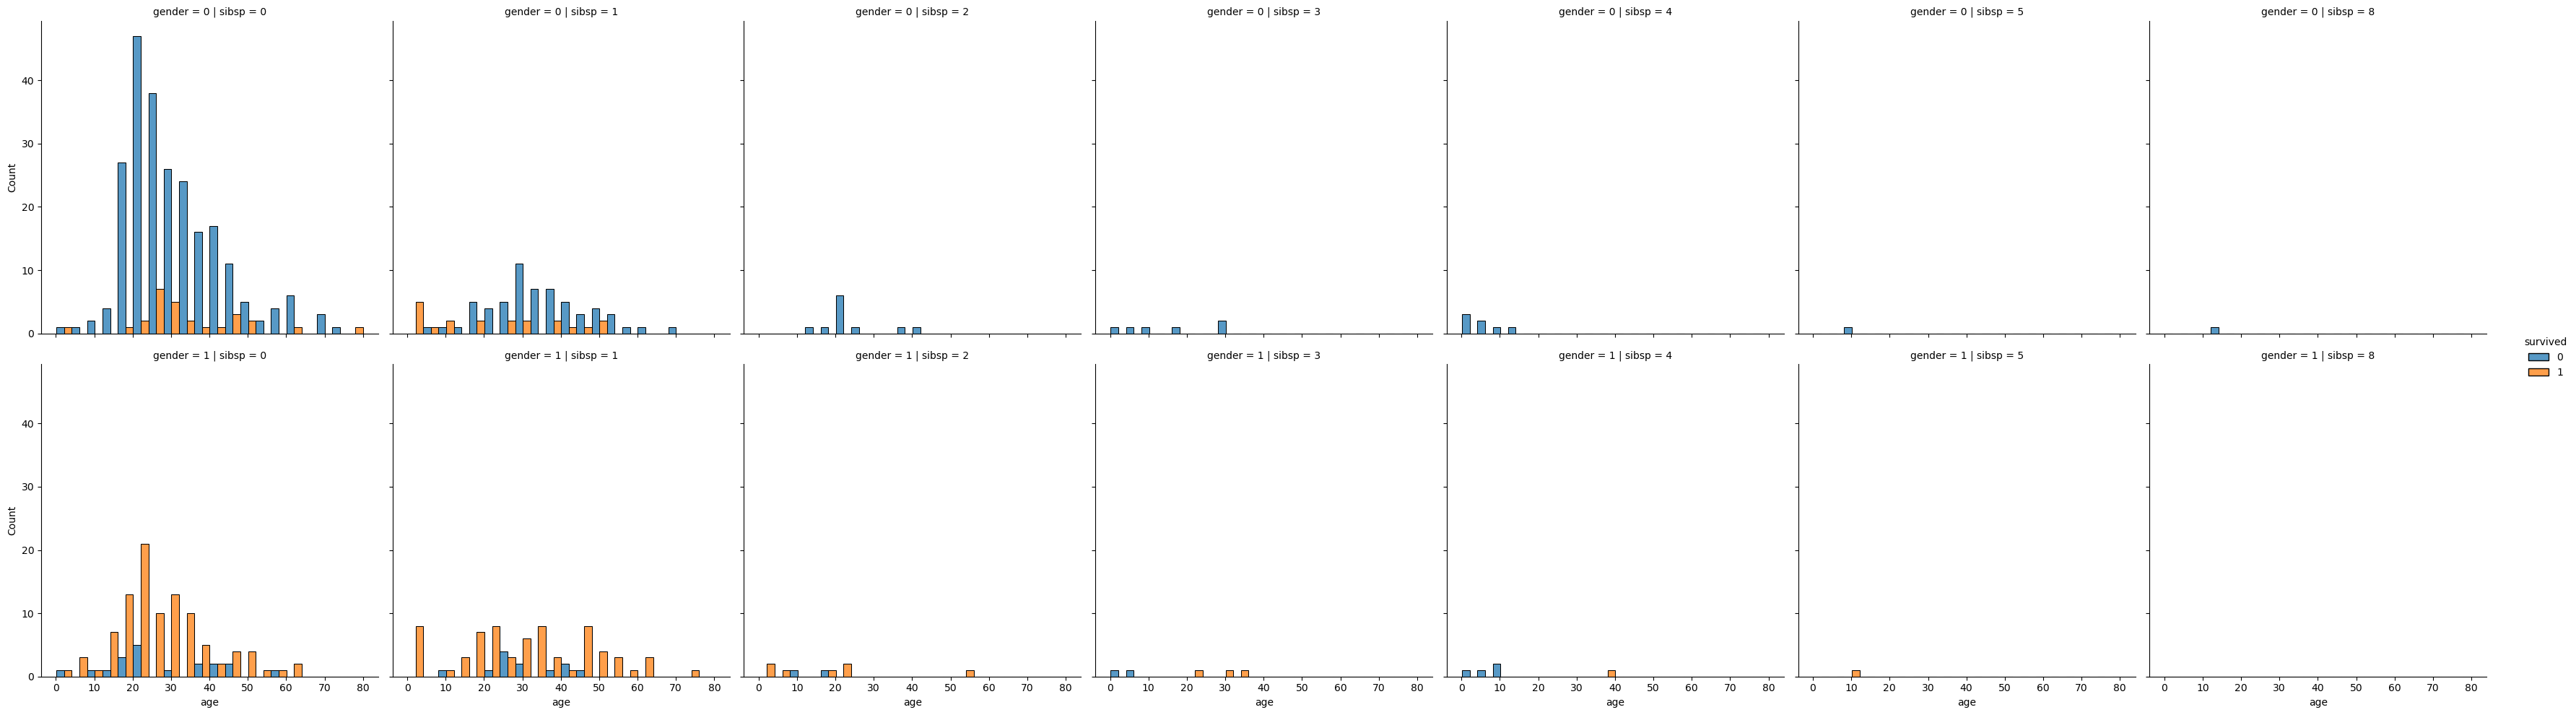

In [109]:
sns.displot(X_train, x="age", hue="survived", multiple="dodge", bins=20, col="sibsp", row='gender')

### add gender_sibsp

In [110]:
def add_gender_sibsp(gender, sibsp):
  result = None
  try:
    if sibsp < 2: # sibsp가 2보다 큰 경우는 모두 2로 통합 (sparse하지 않게 하기 위해)
      result = str(gender)+'_'+str(sibsp)
    else:
      result = str(gender)+'_2'
  except:
    pass 
  return result 

X_train['gender_sibsp'] = X_train.apply(lambda row: add_gender_sibsp(row['gender'], row['sibsp']), axis=1)
X_val['gender_sibsp'] = X_val.apply(lambda row: add_gender_sibsp(row['gender'], row['sibsp']), axis=1)
titanic_test_origin['gender_sibsp'] = titanic_test_origin.apply(lambda row: add_gender_sibsp(row['gender'], row['sibsp']), axis=1)

print(f"{X_train['gender_sibsp'].nunique()} / \n {X_train['gender_sibsp'].unique()} \n")
X_train.shape, X_val.shape, titanic_test_origin.shape

6 / 
 ['1_1' '0_0' '0_1' '1_2' '1_0' '0_2'] 



((732, 25), (184, 25), (393, 24))

### add gender parch

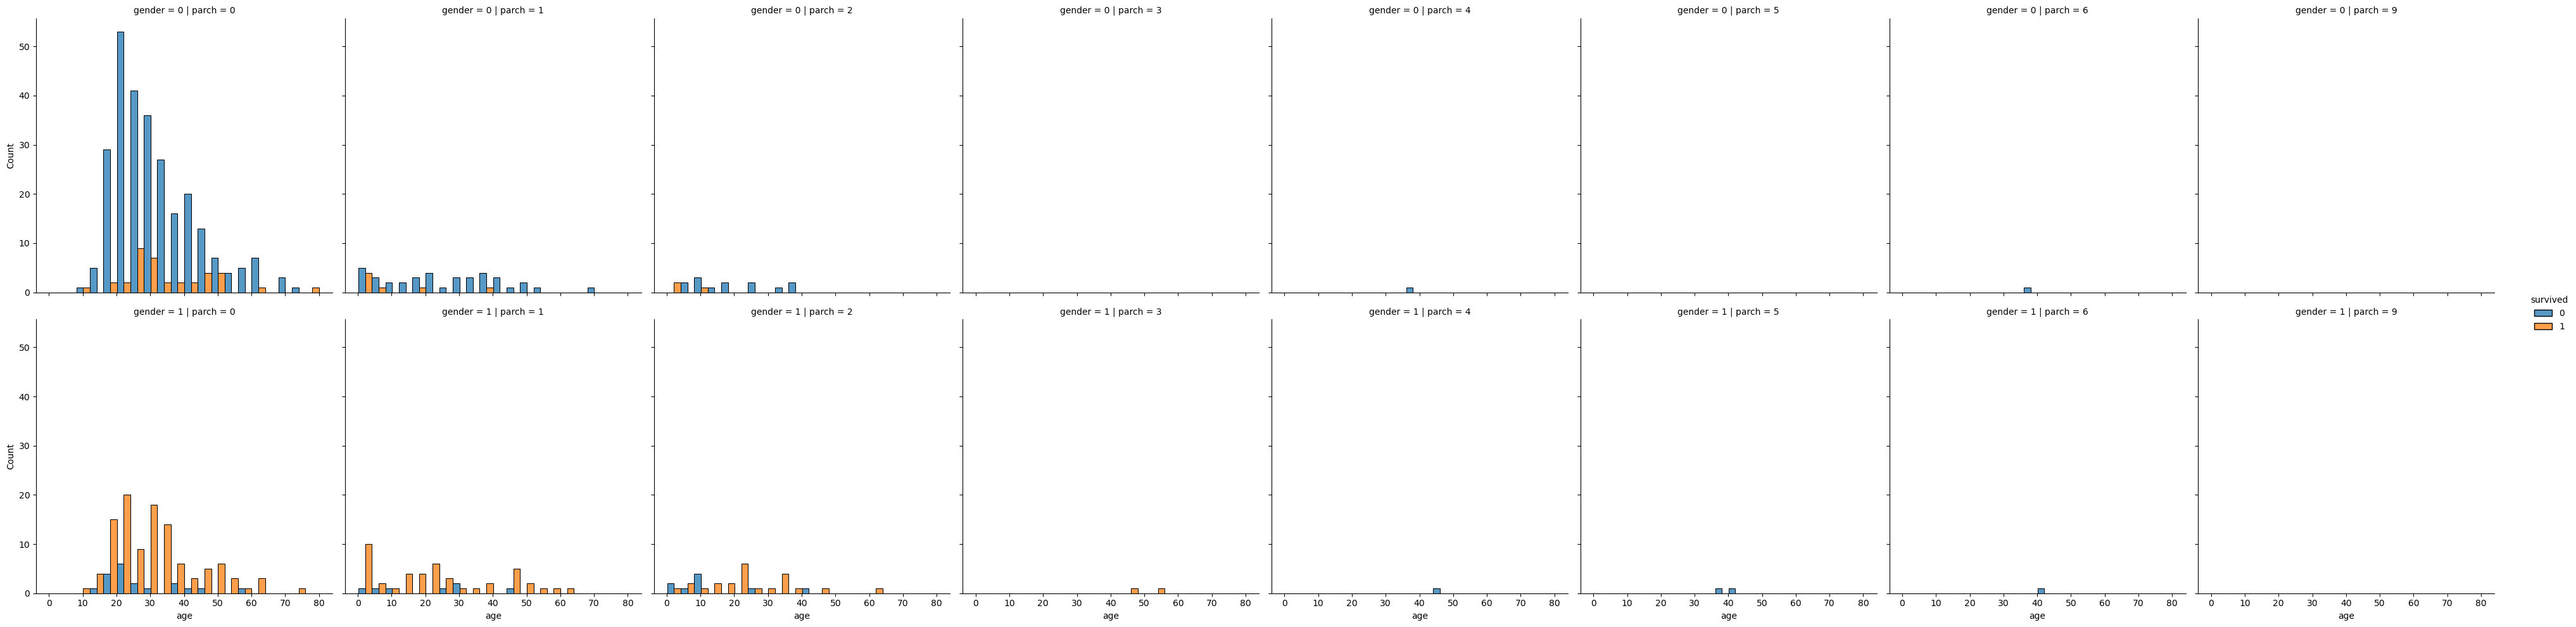

In [111]:
sns.displot(X_train, x="age", hue="survived", multiple="dodge", bins=20, col="parch", row='gender')

In [112]:
# parch가 0은 남기고 1이상은 1로 통합
X_train['gender_parch'] = X_train.apply(lambda row: str(row['gender'])+'_0' if int(row['parch']) == 0 else str(row['gender'])+'_1', axis=1)
X_val['gender_parch'] = X_val.apply(lambda row: str(row['gender'])+'_0' if int(row['parch']) == 0 else str(row['gender'])+'_1', axis=1)
titanic_test_origin['gender_parch'] = titanic_test_origin.apply(lambda row: str(row['gender'])+'_0' if int(row['parch']) == 0 else str(row['gender'])+'_1', axis=1)

print(f"{X_train['gender_parch'].nunique()} / \n {X_train['gender_parch'].unique()} \n")
X_train.shape, X_val.shape, titanic_test_origin.shape

4 / 
 ['1_1' '0_0' '0_1' '1_0'] 



((732, 26), (184, 26), (393, 25))

## Encoding

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   passengerid        732 non-null    int64  
 3   gender             732 non-null    int64  
 4   parch              732 non-null    int64  
 5   survived           732 non-null    int64  
 6   pclass             732 non-null    int64  
 7   initial            732 non-null    object 
 8   infant             732 non-null    int64  
 9   cabin              170 non-null    object 
 10  fare               732 non-null    float64
 11  sibsp              732 non-null    int64  
 12  ticket             732 non-null    object 
 13  embarked           732 non-null    int64  
 14  gender_infant_0_0  732 non-null    float64
 15  gender_infant_0_1  732 non-null    float64
 16  gender_infant_1_0  732 non

In [114]:
enc_cols = ['gender_sibsp', 'gender_parch']
print(f'len_enc_cols: {len(enc_cols)}')
encoder = OneHotEncoder() 
enc_dfs = []

for i, df in enumerate([X_train, X_val, titanic_test_origin]):
  if not i:
    _encoded = encoder.fit_transform(df[enc_cols])
  else:
    _encoded = encoder.transform(df[enc_cols])

  _encoded_df = pd.DataFrame(
    _encoded.toarray(), 
    columns = encoder.get_feature_names_out()
  )

  not_enc_cols = list(set(df.columns) - set(enc_cols))
  enc_dfs.append(
    pd.concat(
      [df[not_enc_cols].reset_index(drop=True), _encoded_df.reset_index(drop=True)]
      , axis=1
    ).reset_index(drop=True)
  )

X_train = enc_dfs[0]
X_val = enc_dfs[1]
titanic_test_origin = enc_dfs[2]

print(f'{X_train.isnull().sum().sum()} / {X_val.isnull().sum().sum()} / {titanic_test_origin.isnull().sum().sum()}')
X_train.shape, X_val.shape, titanic_test_origin.shape

len_enc_cols: 2
709 / 189 / 380


((732, 34), (184, 34), (393, 33))

## 상관관계

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   gender_infant_0_0  732 non-null    float64
 3   passengerid        732 non-null    int64  
 4   gender             732 non-null    int64  
 5   gender_infant_1_0  732 non-null    float64
 6   survived           732 non-null    int64  
 7   parch              732 non-null    int64  
 8   gender_pclass_1_3  732 non-null    float64
 9   gender_pclass_0_2  732 non-null    float64
 10  gender_infant_0_1  732 non-null    float64
 11  pclass             732 non-null    int64  
 12  gender_pclass_1_1  732 non-null    float64
 13  initial            732 non-null    object 
 14  infant             732 non-null    int64  
 15  cabin              170 non-null    object 
 16  gender_pclass_0_3  732 non

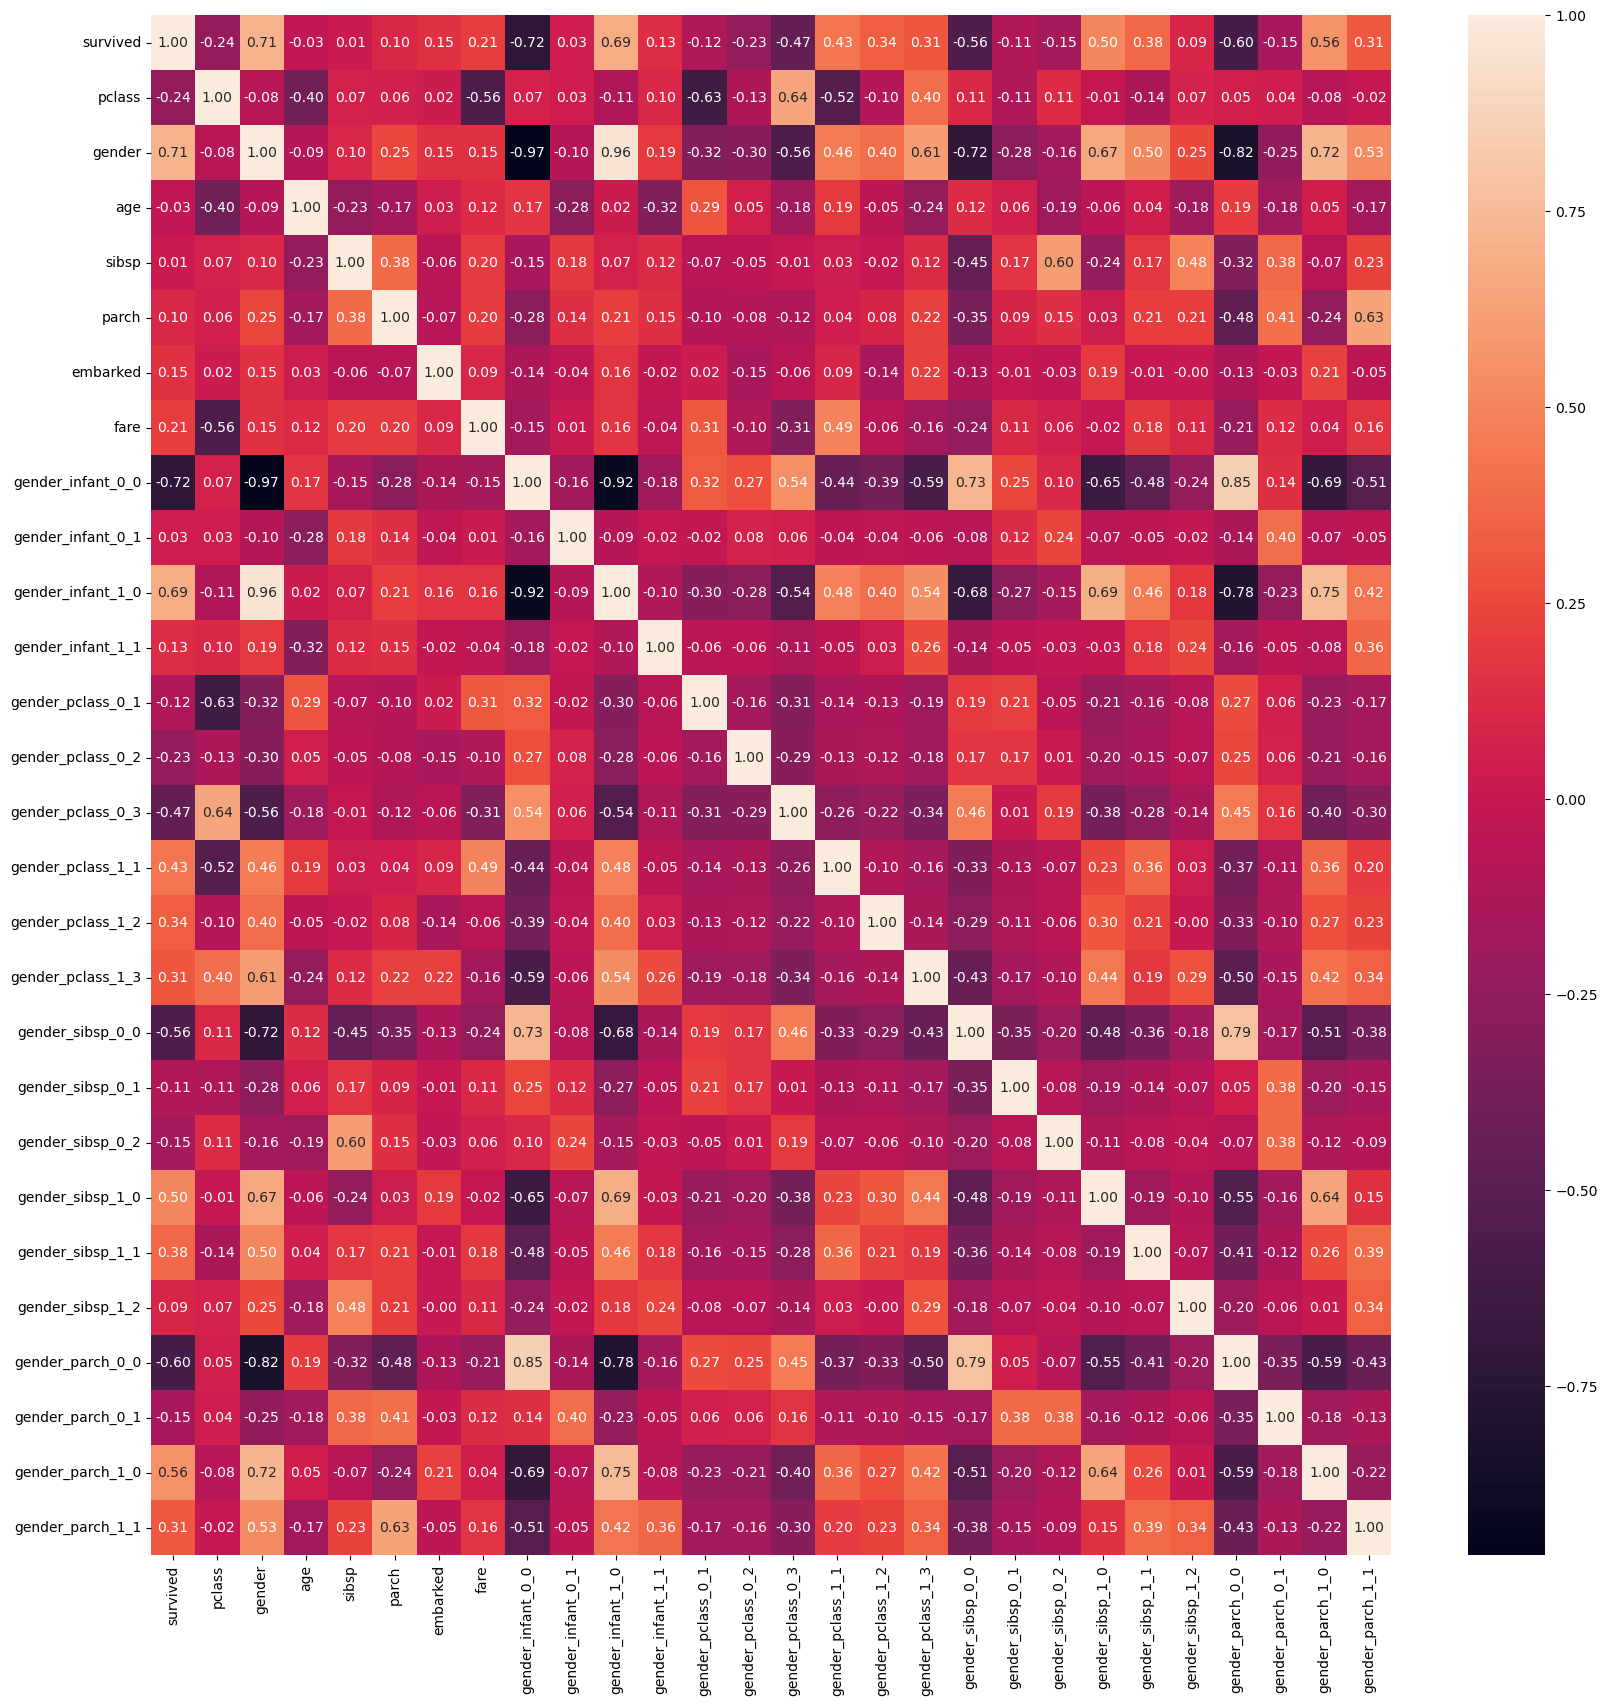

In [116]:
plt.figure(figsize = (20, 20))
list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'embarked', 'fare', 
         'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0', 'gender_infant_1_1', 
         'gender_pclass_0_1', 'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1', 
         'gender_pclass_1_2', 'gender_pclass_1_3', 'gender_sibsp_0_0', 'gender_sibsp_0_1',
         'gender_sibsp_0_2', 'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
         'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0', 'gender_parch_1_1']
sns.heatmap(X_train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## Machine Learning

In [117]:
X_tr = X_train.copy()
X_te = X_val.copy()
test = titanic_test_origin.copy()

In [118]:
# 최빈값
fare_mode = X_tr['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# NA imputation
test['fare'] = test['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(test['fare'].isnull().sum())

0


In [119]:
## Assigning the NaN Values with the Ceil values of the mean ages

# 값이 여러개일 경우 평균으로 지정
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mr'),'age']=21
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mrs'),'age']=45
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Master'),'age']=5
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Miss'),'age']=20
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Other'),'age']=44

X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mr'),'age']=21
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mrs'),'age']=45
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Master'),'age']=5
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Miss'),'age']=20
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Other'),'age']=44


test.loc[(test.age.isnull())&(test.initial=='Mr'),'age']=21
test.loc[(test.age.isnull())&(test.initial=='Mrs'),'age']=45
test.loc[(test.age.isnull())&(test.initial=='Master'),'age']=5
test.loc[(test.age.isnull())&(test.initial=='Miss'),'age']=20
test.loc[(test.age.isnull())&(test.initial=='Other'),'age']=44

In [120]:
X_tr.age.isnull().sum().sum(), X_te.age.isnull().sum().sum(), test.age.isnull().sum().sum()

(0, 0, 0)

In [121]:
X_tr.columns

Index(['name', 'age', 'gender_infant_0_0', 'passengerid', 'gender',
       'gender_infant_1_0', 'survived', 'parch', 'gender_pclass_1_3',
       'gender_pclass_0_2', 'gender_infant_0_1', 'pclass', 'gender_pclass_1_1',
       'initial', 'infant', 'cabin', 'gender_pclass_0_3', 'gender_pclass_1_2',
       'fare', 'sibsp', 'ticket', 'gender_infant_1_1', 'embarked',
       'gender_pclass_0_1', 'gender_sibsp_0_0', 'gender_sibsp_0_1',
       'gender_sibsp_0_2', 'gender_sibsp_1_0', 'gender_sibsp_1_1',
       'gender_sibsp_1_2', 'gender_parch_0_0', 'gender_parch_0_1',
       'gender_parch_1_0', 'gender_parch_1_1'],
      dtype='object')

In [122]:
test.columns

Index(['name', 'age', 'gender_infant_0_0', 'passengerid', 'gender',
       'gender_infant_1_0', 'parch', 'gender_pclass_1_3', 'gender_pclass_0_2',
       'gender_infant_0_1', 'pclass', 'gender_pclass_1_1', 'initial', 'infant',
       'cabin', 'gender_pclass_0_3', 'gender_pclass_1_2', 'fare', 'sibsp',
       'ticket', 'gender_infant_1_1', 'embarked', 'gender_pclass_0_1',
       'gender_sibsp_0_0', 'gender_sibsp_0_1', 'gender_sibsp_0_2',
       'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
       'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0',
       'gender_parch_1_1'],
      dtype='object')

In [123]:
X_tr = X_tr.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
X_te = X_te.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
test = test.drop(['initial', 'name', 'ticket', 'cabin'], axis = 1)
X_tr.head()

,age,gender_infant_0_0,gender,gender_infant_1_0,parch,gender_pclass_1_3,gender_pclass_0_2,gender_infant_0_1,pclass,gender_pclass_1_1,...,gender_sibsp_0_0,gender_sibsp_0_1,gender_sibsp_0_2,gender_sibsp_1_0,gender_sibsp_1_1,gender_sibsp_1_2,gender_parch_0_0,gender_parch_0_1,gender_parch_1_0,gender_parch_1_1
0,52.0,0.0,1,1.0,1,0.0,0.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21.0,1.0,0,0.0,0,0.0,0.0,0.0,3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,45.0,1.0,0,0.0,0,0.0,0.0,0.0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,48.0,0.0,1,1.0,3,0.0,0.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,70.0,1.0,0,0.0,1,0.0,0.0,0.0,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [124]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_tr, y_train)
y_pred = gaussian.predict(X_te)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_tr, y_train)
y_pred = logreg.predict(X_te)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr, y_train)
y_pred = svc.predict(X_te)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_tr, y_train)
y_pred = linear_svc.predict(X_te)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_tr, y_train)
y_pred = perceptron.predict(X_te)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr, y_train)
y_pred = decisiontree.predict(X_te)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_tr, y_train)
y_pred = randomforest.predict(X_te)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_tr, y_train)
y_pred = sgd.predict(X_te)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_tr, y_train)
y_pred = gbk.predict(X_te)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 83.7
------------------------------
Logistic Regression : 83.7
------------------------------
Support Vector Machines : 64.13
------------------------------
Linear SVC : 82.61
------------------------------
Perceptron : 83.7
------------------------------
Decision Tree : 78.8
------------------------------
Random Forest : 78.8
------------------------------
KNN or k-Nearest Neighbors : 67.93
------------------------------
Stochastic Gradient Descent : 79.35
------------------------------
Gradient Boosting Classifier : 84.24


### Synthesis Model results(모델별 결과 종합)

In [125]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.24
2,Logistic Regression,83.70
4,Naive Bayes,83.70
5,Perceptron,83.70
6,Linear SVC,82.61
8,Stochastic Gradient Descent,79.35
3,Random Forest,78.80
7,Decision Tree,78.80
1,KNN,67.93
0,Support Vector Machines,64.13


### Predict and Save

In [126]:
X_tr.columns

Index(['age', 'gender_infant_0_0', 'gender', 'gender_infant_1_0', 'parch',
       'gender_pclass_1_3', 'gender_pclass_0_2', 'gender_infant_0_1', 'pclass',
       'gender_pclass_1_1', 'infant', 'gender_pclass_0_3', 'gender_pclass_1_2',
       'fare', 'sibsp', 'gender_infant_1_1', 'embarked', 'gender_pclass_0_1',
       'gender_sibsp_0_0', 'gender_sibsp_0_1', 'gender_sibsp_0_2',
       'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
       'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0',
       'gender_parch_1_1'],
      dtype='object')

In [127]:
test.columns

Index(['age', 'gender_infant_0_0', 'passengerid', 'gender',
       'gender_infant_1_0', 'parch', 'gender_pclass_1_3', 'gender_pclass_0_2',
       'gender_infant_0_1', 'pclass', 'gender_pclass_1_1', 'infant',
       'gender_pclass_0_3', 'gender_pclass_1_2', 'fare', 'sibsp',
       'gender_infant_1_1', 'embarked', 'gender_pclass_0_1',
       'gender_sibsp_0_0', 'gender_sibsp_0_1', 'gender_sibsp_0_2',
       'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
       'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0',
       'gender_parch_1_1'],
      dtype='object')

In [128]:
# Model3 (initial_age + infant + pclass + sibsp + parch)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = randomforest.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 3_randomforest.csv', index=False)

# ★ Model 4(initial_age, infant, pclass, sibsp, parch, family size

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   gender_infant_0_0  732 non-null    float64
 3   passengerid        732 non-null    int64  
 4   gender             732 non-null    int64  
 5   gender_infant_1_0  732 non-null    float64
 6   survived           732 non-null    int64  
 7   parch              732 non-null    int64  
 8   gender_pclass_1_3  732 non-null    float64
 9   gender_pclass_0_2  732 non-null    float64
 10  gender_infant_0_1  732 non-null    float64
 11  pclass             732 non-null    int64  
 12  gender_pclass_1_1  732 non-null    float64
 13  initial            732 non-null    object 
 14  infant             732 non-null    int64  
 15  cabin              170 non-null    object 
 16  gender_pclass_0_3  732 non

## add family_size

In [130]:
# sibsp랑 parch 통합
X_train['family_size'] = 0
X_train['family_size'] = X_train['parch'] + X_train['sibsp']#family size
X_train['alone'] = 0
X_train.loc[X_train.family_size==0,'alone'] = 1 #Alone
X_train

,name,age,gender_infant_0_0,passengerid,gender,gender_infant_1_0,survived,parch,gender_pclass_1_3,gender_pclass_0_2,...,gender_sibsp_0_2,gender_sibsp_1_0,gender_sibsp_1_1,gender_sibsp_1_2,gender_parch_0_0,gender_parch_0_1,gender_parch_1_0,gender_parch_1_1,family_size,alone
0,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",52.0,0.0,2,1,1.0,1,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,0
1,"Doharr, Mr. Tannous",NaN,1.0,606,0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
2,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",45.0,1.0,178,0,0.0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
3,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.0,0.0,640,1,1.0,1,3,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4,0
4,"Crosby, Capt. Edward Gifford",70.0,1.0,636,0,0.0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,"Fleming, Miss. Margaret",NaN,0.0,282,1,1.0,1,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
728,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,0.0,128,1,1.0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
729,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",44.0,0.0,17,1,1.0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
730,"Harper, Mr. Henry Sleeper",48.0,1.0,861,0,0.0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0


In [131]:
X_val['family_size'] = 0
X_val['family_size'] = X_val['parch'] + X_val['sibsp']#family size
X_val['alone'] = 0
X_val.loc[X_val.family_size==0,'alone'] = 1 #Alone

titanic_test_origin['family_size'] = 0
titanic_test_origin['family_size'] = titanic_test_origin['parch'] + titanic_test_origin['sibsp']#family size
titanic_test_origin['alone'] = 0
titanic_test_origin.loc[titanic_test_origin.family_size==0,'alone'] = 1 #Alone

## 상관관계

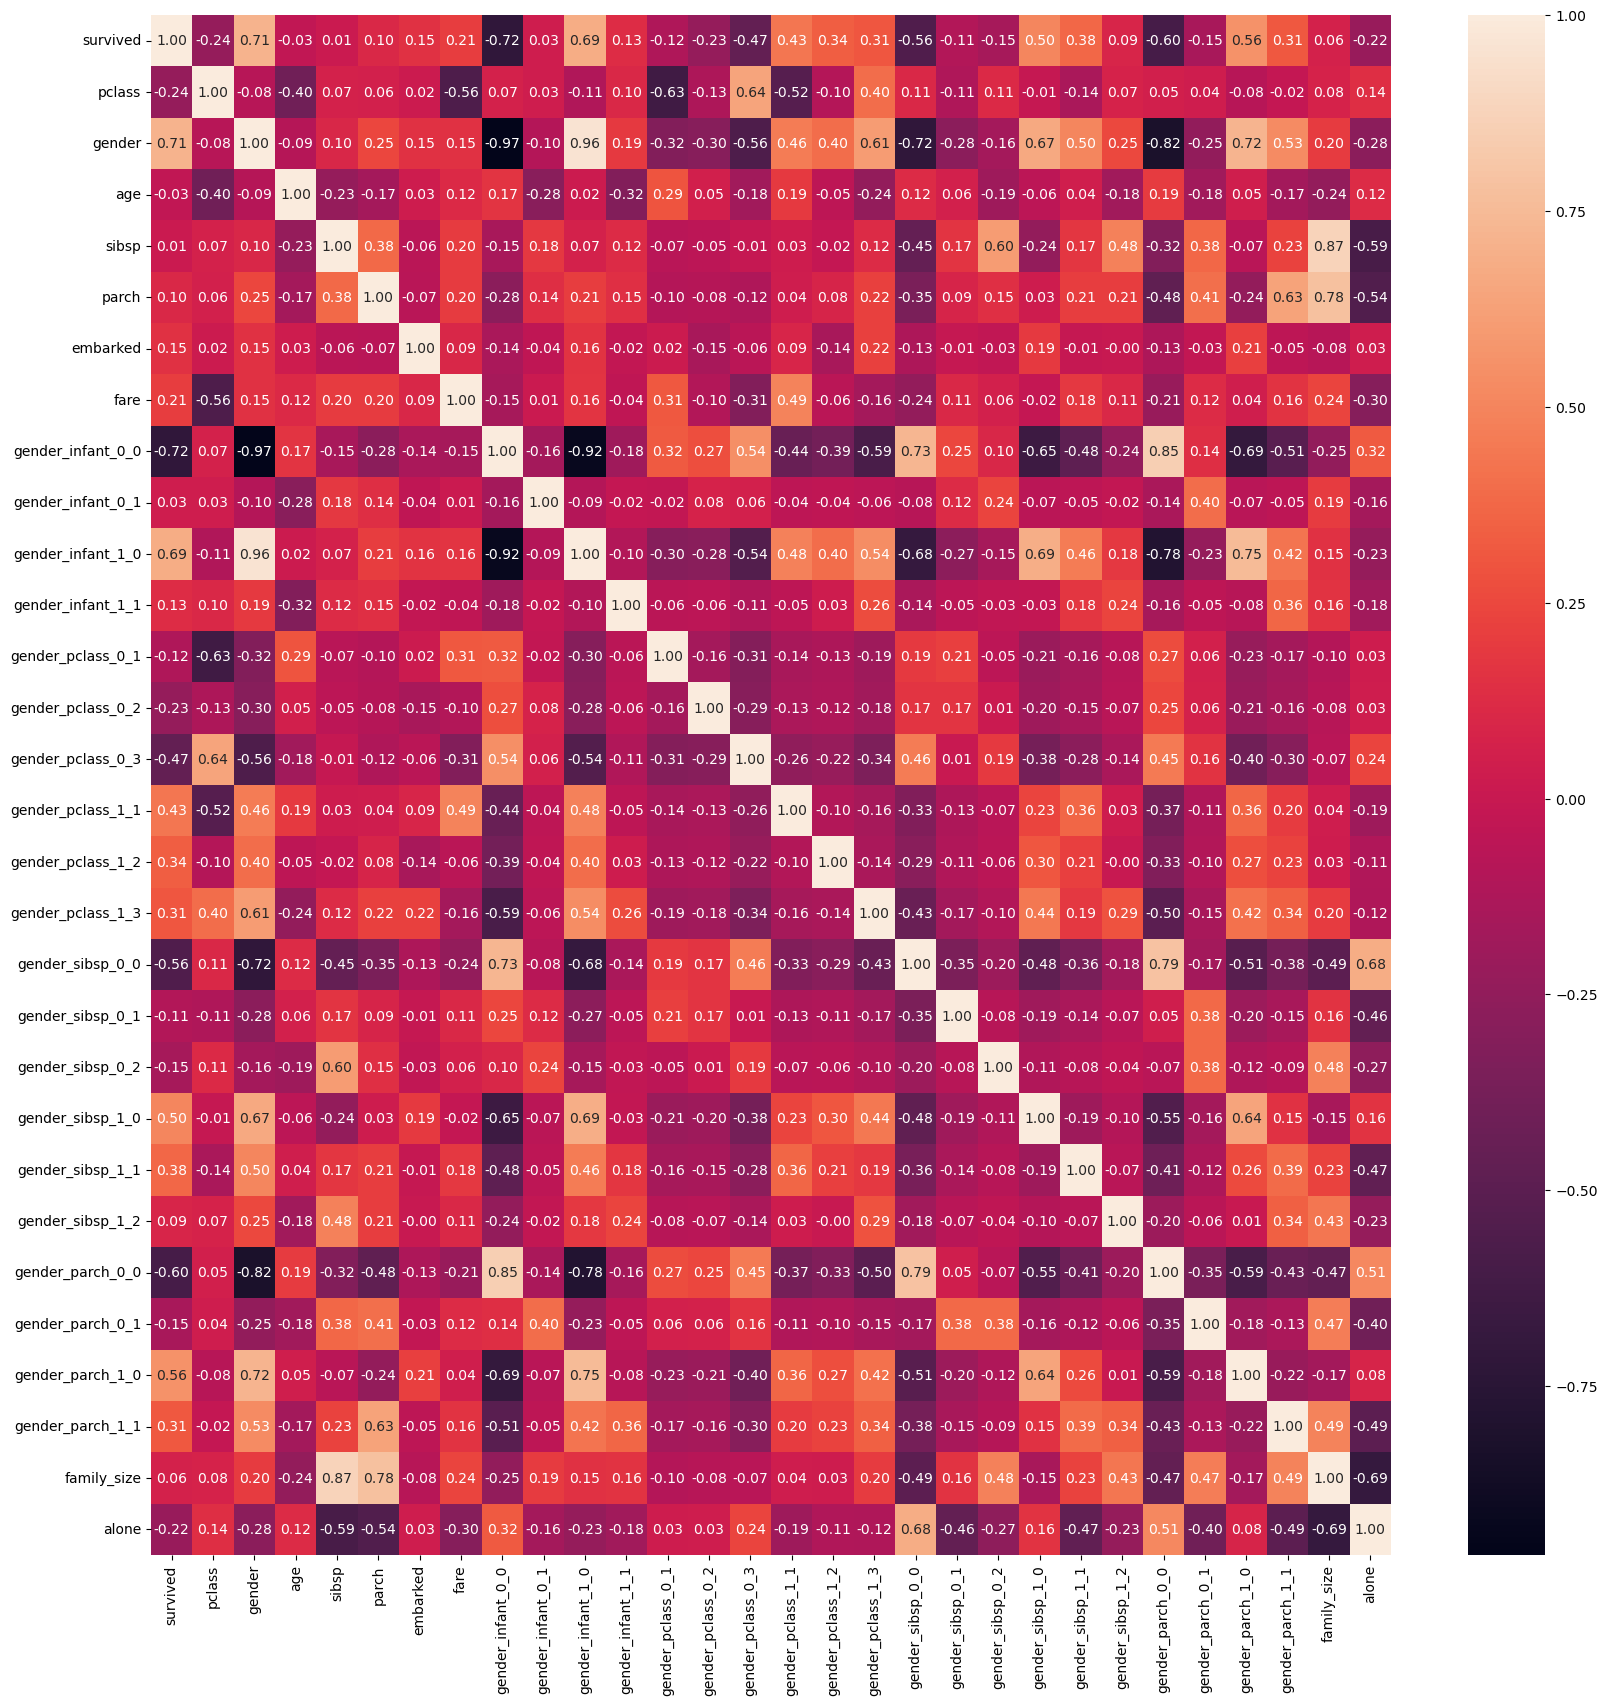

In [132]:
plt.figure(figsize = (20, 20))
list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'embarked', 'fare', 
         'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0', 'gender_infant_1_1', 
         'gender_pclass_0_1', 'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1', 
         'gender_pclass_1_2', 'gender_pclass_1_3', 'gender_sibsp_0_0', 'gender_sibsp_0_1',
         'gender_sibsp_0_2', 'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
         'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0', 'gender_parch_1_1',
         'family_size', 'alone']
sns.heatmap(X_train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

## Machine Learning

In [133]:
X_tr = X_train.copy()
X_te = X_val.copy()
test = titanic_test_origin.copy()

In [134]:
# 최빈값
fare_mode = X_tr['fare'].mode().values[0]
# S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# NA imputation
test['fare'] = test['fare'].fillna(fare_mode)
# train의 최빈값을 test에 모두 채워준다.

# 확인
print(test['fare'].isnull().sum())

0


In [135]:
## Assigning the NaN Values with the Ceil values of the mean ages

# 값이 여러개일 경우 평균으로 지정
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mr'),'age']=21
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mrs'),'age']=45
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Master'),'age']=5
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Miss'),'age']=20
X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Other'),'age']=44

X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mr'),'age']=21
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mrs'),'age']=45
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Master'),'age']=5
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Miss'),'age']=20
X_te.loc[(X_te.age.isnull())&(X_te.initial=='Other'),'age']=44


test.loc[(test.age.isnull())&(test.initial=='Mr'),'age']=21
test.loc[(test.age.isnull())&(test.initial=='Mrs'),'age']=45
test.loc[(test.age.isnull())&(test.initial=='Master'),'age']=5
test.loc[(test.age.isnull())&(test.initial=='Miss'),'age']=20
test.loc[(test.age.isnull())&(test.initial=='Other'),'age']=44

In [136]:
X_tr.age.isnull().sum().sum(), X_te.age.isnull().sum().sum(), test.age.isnull().sum().sum()

(0, 0, 0)

In [137]:
X_tr.columns

Index(['name', 'age', 'gender_infant_0_0', 'passengerid', 'gender',
       'gender_infant_1_0', 'survived', 'parch', 'gender_pclass_1_3',
       'gender_pclass_0_2', 'gender_infant_0_1', 'pclass', 'gender_pclass_1_1',
       'initial', 'infant', 'cabin', 'gender_pclass_0_3', 'gender_pclass_1_2',
       'fare', 'sibsp', 'ticket', 'gender_infant_1_1', 'embarked',
       'gender_pclass_0_1', 'gender_sibsp_0_0', 'gender_sibsp_0_1',
       'gender_sibsp_0_2', 'gender_sibsp_1_0', 'gender_sibsp_1_1',
       'gender_sibsp_1_2', 'gender_parch_0_0', 'gender_parch_0_1',
       'gender_parch_1_0', 'gender_parch_1_1', 'family_size', 'alone'],
      dtype='object')

In [138]:
test.columns

Index(['name', 'age', 'gender_infant_0_0', 'passengerid', 'gender',
       'gender_infant_1_0', 'parch', 'gender_pclass_1_3', 'gender_pclass_0_2',
       'gender_infant_0_1', 'pclass', 'gender_pclass_1_1', 'initial', 'infant',
       'cabin', 'gender_pclass_0_3', 'gender_pclass_1_2', 'fare', 'sibsp',
       'ticket', 'gender_infant_1_1', 'embarked', 'gender_pclass_0_1',
       'gender_sibsp_0_0', 'gender_sibsp_0_1', 'gender_sibsp_0_2',
       'gender_sibsp_1_0', 'gender_sibsp_1_1', 'gender_sibsp_1_2',
       'gender_parch_0_0', 'gender_parch_0_1', 'gender_parch_1_0',
       'gender_parch_1_1', 'family_size', 'alone'],
      dtype='object')

In [139]:
X_tr = X_tr.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin', 'parch', 'sibsp', 'infant'], axis=1)
X_te = X_te.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin', 'parch', 'sibsp', 'infant'], axis=1)
test = test.drop(['initial', 'name', 'ticket', 'cabin',  'parch', 'sibsp', 'infant'], axis = 1)
X_tr.head()

,age,gender_infant_0_0,gender,gender_infant_1_0,gender_pclass_1_3,gender_pclass_0_2,gender_infant_0_1,pclass,gender_pclass_1_1,gender_pclass_0_3,...,gender_sibsp_0_2,gender_sibsp_1_0,gender_sibsp_1_1,gender_sibsp_1_2,gender_parch_0_0,gender_parch_0_1,gender_parch_1_0,gender_parch_1_1,family_size,alone
0,52.0,0.0,1,1.0,0.0,0.0,0.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,0
1,21.0,1.0,0,0.0,0.0,0.0,0.0,3,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
2,45.0,1.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
3,48.0,0.0,1,1.0,0.0,0.0,0.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4,0
4,70.0,1.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0


In [140]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_tr, y_train)
y_pred = gaussian.predict(X_te)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussina Naive Bayes :", acc_gaussian)

print("-"*30)

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_tr, y_train)
y_pred = logreg.predict(X_te)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression :", acc_logreg)

print("-"*30)

# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_tr, y_train)
y_pred = svc.predict(X_te)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines :", acc_svc)

print("-"*30)

# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_tr, y_train)
y_pred = linear_svc.predict(X_te)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC :", acc_linear_svc)

print("-"*30)

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_tr, y_train)
y_pred = perceptron.predict(X_te)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron :", acc_perceptron)

print("-"*30)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_tr, y_train)
y_pred = decisiontree.predict(X_te)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree :", acc_decisiontree)

print("-"*30)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_tr, y_train)
y_pred = randomforest.predict(X_te)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest :", acc_randomforest)

print("-"*30)

# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_tr, y_train)
y_pred = knn.predict(X_te)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN or k-Nearest Neighbors :", acc_knn)

print("-"*30)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_tr, y_train)
y_pred = sgd.predict(X_te)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent :", acc_sgd)

print("-"*30)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_tr, y_train)
y_pred = gbk.predict(X_te)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier :", acc_gbk)

Gaussina Naive Bayes : 84.78
------------------------------
Logistic Regression : 84.24
------------------------------
Support Vector Machines : 64.67
------------------------------
Linear SVC : 83.15
------------------------------
Perceptron : 78.26
------------------------------
Decision Tree : 82.07
------------------------------
Random Forest : 79.89
------------------------------
KNN or k-Nearest Neighbors : 68.48
------------------------------
Stochastic Gradient Descent : 66.3
------------------------------
Gradient Boosting Classifier : 83.7


### Synthesis Model results(모델별 결과 종합)

In [141]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Naive Bayes,84.78
2,Logistic Regression,84.24
9,Gradient Boosting Classifier,83.70
6,Linear SVC,83.15
7,Decision Tree,82.07
3,Random Forest,79.89
5,Perceptron,78.26
1,KNN,68.48
8,Stochastic Gradient Descent,66.30
0,Support Vector Machines,64.67


### Predict and Save

In [142]:
# Model4 (initial_age + infant + pclass + sibsp + parch + family size)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = logreg.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 4_logreg.csv', index=False)

In [143]:
# Model4 (initial_age + infant + pclass + sibsp + parch + family size)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = randomforest.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 4_randomforest.csv', index=False)

In [144]:
# Model4 (initial_age + infant + pclass + sibsp + parch + family size)

#set ids as PassengerId and predict survival 
ids = test['passengerid']
predictions = gbk.predict(test.drop('passengerid' , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 4_gbk.csv', index=False)

# ★ Model 5(initial_age, infant, pclass, fare)

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               732 non-null    object 
 1   age                585 non-null    float64
 2   gender_infant_0_0  732 non-null    float64
 3   passengerid        732 non-null    int64  
 4   gender             732 non-null    int64  
 5   gender_infant_1_0  732 non-null    float64
 6   survived           732 non-null    int64  
 7   parch              732 non-null    int64  
 8   gender_pclass_1_3  732 non-null    float64
 9   gender_pclass_0_2  732 non-null    float64
 10  gender_infant_0_1  732 non-null    float64
 11  pclass             732 non-null    int64  
 12  gender_pclass_1_1  732 non-null    float64
 13  initial            732 non-null    object 
 14  infant             732 non-null    int64  
 15  cabin              170 non-null    object 
 16  gender_pclass_0_3  732 non

## 1. EDA

In [146]:
# sns.displot(X_train, x="fare", hue="survived")

In [147]:
# sns.displot(X_train, x="fare", hue="survived", multiple="dodge", bins=20, col="gender")

In [148]:
# check1 = X_train['fare'] >= 100
# X_train.loc[check1]['survived'].mean()

In [149]:
# check2 = X_train[X_train.gender == 0]['fare'] >= 100
# X_train[X_train.gender == 0].loc[check2]['survived'].mean()

In [150]:
# check3 = X_train[X_train.gender == 1]['fare'] >= 100
# X_train[X_train.gender == 1].loc[check3]['survived'].mean()
# # 여자이면서 fare 100 이상이면 거의 생존

In [151]:
# check1 = X_train['fare'] < 100
# check2 = X_train['fare'] >= 50
# c = check1 & check2
# X_train.loc[c]['survived'].mean()

In [152]:
# check3 = X_train[X_train.gender == 0]['fare'] < 100
# check4 = X_train[X_train.gender == 0]['fare'] >= 50
# c = check3 & check4
# X_train[X_train.gender == 0].loc[c]['survived'].mean()

In [153]:
# check5 = X_train[X_train.gender == 1]['fare'] < 100
# check6 = X_train[X_train.gender == 1]['fare'] >= 50
# c = check5 & check6
# X_train[X_train.gender == 1].loc[c]['survived'].mean()

In [154]:
# 여자이면서 fare 50 이상이면 거의 생존
# 남자는 그다지 좋은 지표가 못 된다.

### add fare_seperate

In [155]:
# print("before :", X_train.shape, X_val.shape, titanic_test_origin.shape)
# def add_fare_seperate(fare):
#     result = 0
#     try:
#         if fare > 50:
#             result = 1
#     except:
#         pass
#     return result # fare 50 이상이면 생존, 50미만이면 사망



# X_train['fare_seperate'] = X_train['fare'].map(lambda x: add_fare_seperate(x))
# X_val['fare_seperate'] = X_val['fare'].map(lambda x: add_fare_seperate(x))
# titanic_test_origin['fare_seperate'] = titanic_test_origin['fare'].map(lambda x: add_fare_seperate(x))

### add gender_fare

In [156]:
# X_train['gender_fare'] = X_train.apply(lambda row: str(row['gender'])+'_'+str(row['fare_seperate']), axis=1)
# X_val['gender_fare'] = X_val.apply(lambda row: str(row['gender'])+'_'+str(row['fare_seperate']), axis=1)
# titanic_test_origin['gender_fare'] = titanic_test_origin.apply(lambda row: str(row['gender'])+'_'+str(row['fare_seperate']), axis=1)

# print(f"{X_train['gender_fare'].nunique()} / \n {X_train['gender_fare'].unique()} \n")
# X_train.shape, X_val.shape, titanic_test_origin.shape

## Encoding

In [157]:
# from sklearn.preprocessing import OneHotEncoder

# X_train.info()

In [158]:
# enc_cols = ['gender_fare']
# print(f'len_enc_cols: {len(enc_cols)}')
# encoder = OneHotEncoder() 
# enc_dfs = []

# for i, df in enumerate([X_train, X_val, titanic_test_origin]):
#   if not i:
#     _encoded = encoder.fit_transform(df[enc_cols])
#   else:
#     _encoded = encoder.transform(df[enc_cols])

#   _encoded_df = pd.DataFrame(
#     _encoded.toarray(), 
#     columns = encoder.get_feature_names_out()
#   )

#   not_enc_cols = list(set(df.columns) - set(enc_cols))
#   enc_dfs.append(
#     pd.concat(
#       [df[not_enc_cols].reset_index(drop=True), _encoded_df.reset_index(drop=True)]
#       , axis=1
#     ).reset_index(drop=True)
#   )

# X_train = enc_dfs[0]
# X_val = enc_dfs[1]
# titanic_test_origin = enc_dfs[2]

# print(f'{X_train.isnull().sum().sum()} / {X_val.isnull().sum().sum()} / {titanic_test_origin.isnull().sum().sum()}')
# X_train.shape, X_val.shape, titanic_test_origin.shape

## 상관관계

In [159]:
# X_train.info()

In [160]:
# plt.figure(figsize = (20, 20))
# list1 = ['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'embarked', 'fare', 
#          'gender_infant_0_0', 'gender_infant_0_1', 'gender_infant_1_0', 'gender_infant_1_1', 
#          'gender_pclass_0_1', 'gender_pclass_0_2', 'gender_pclass_0_3', 'gender_pclass_1_1', 
#          'gender_pclass_1_2', 'gender_pclass_1_3', 'gender_fare_0_0', 'gender_fare_0_1',
#          'gender_fare_1_0', 'gender_fare_1_1']
# sns.heatmap(X_train[list1].corr(), annot = True, fmt = ".2f")
# plt.show()

## Machine Learning

In [161]:
# X_tr = X_train.copy()
# X_te = X_val.copy()
# test = titanic_test_origin.copy()

In [162]:
# # 최빈값
# fare_mode = X_tr['fare'].mode().values[0]
# # S가 최빈값이다.(mode가 Series로 값을 반환하므로 values[0]을해야 '8.05' 반환 가능)

# # NA imputation
# test['fare'] = test['fare'].fillna(fare_mode)
# # train의 최빈값을 test에 모두 채워준다.

# # 확인
# print(test['fare'].isnull().sum())

In [163]:
# ## Assigning the NaN Values with the Ceil values of the mean ages

# # 값이 여러개일 경우 평균으로 지정
# X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mr'),'age']=21
# X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Mrs'),'age']=45
# X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Master'),'age']=5
# X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Miss'),'age']=20
# X_tr.loc[(X_tr.age.isnull())&(X_tr.initial=='Other'),'age']=44

# X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mr'),'age']=21
# X_te.loc[(X_te.age.isnull())&(X_te.initial=='Mrs'),'age']=45
# X_te.loc[(X_te.age.isnull())&(X_te.initial=='Master'),'age']=5
# X_te.loc[(X_te.age.isnull())&(X_te.initial=='Miss'),'age']=20
# X_te.loc[(X_te.age.isnull())&(X_te.initial=='Other'),'age']=44


# test.loc[(test.age.isnull())&(test.initial=='Mr'),'age']=21
# test.loc[(test.age.isnull())&(test.initial=='Mrs'),'age']=45
# test.loc[(test.age.isnull())&(test.initial=='Master'),'age']=5
# test.loc[(test.age.isnull())&(test.initial=='Miss'),'age']=20
# test.loc[(test.age.isnull())&(test.initial=='Other'),'age']=44

In [164]:
# X_tr.age.isnull().sum().sum(), X_te.age.isnull().sum().sum(), test.age.isnull().sum().sum()

In [165]:
# X_tr.columns

In [166]:
# test.columns

In [167]:
# X_tr = X_tr.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
# X_te = X_te.drop(['survived', 'passengerid', 'initial', 'name', 'ticket', 'cabin'], axis=1)
# test = test.drop(['initial', 'name', 'ticket', 'cabin'], axis = 1)
# X_tr.head()

In [168]:
# # Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score

# gaussian = GaussianNB()
# gaussian.fit(X_tr, y_train)
# y_pred = gaussian.predict(X_te)
# acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Gaussina Naive Bayes :", acc_gaussian)

# print("-"*30)

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
# logreg.fit(X_tr, y_train)
# y_pred = logreg.predict(X_te)
# acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Logistic Regression :", acc_logreg)

# print("-"*30)

# # Support Vector Machines
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_tr, y_train)
# y_pred = svc.predict(X_te)
# acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Support Vector Machines :", acc_svc)

# print("-"*30)

# # Linear SVC
# from sklearn.svm import LinearSVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_tr, y_train)
# y_pred = linear_svc.predict(X_te)
# acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Linear SVC :", acc_linear_svc)

# print("-"*30)

# # Perceptron
# from sklearn.linear_model import Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_tr, y_train)
# y_pred = perceptron.predict(X_te)
# acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Perceptron :", acc_perceptron)

# print("-"*30)

# # Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# decisiontree = DecisionTreeClassifier()
# decisiontree.fit(X_tr, y_train)
# y_pred = decisiontree.predict(X_te)
# acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Decision Tree :", acc_decisiontree)

# print("-"*30)

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier

# randomforest = RandomForestClassifier()
# randomforest.fit(X_tr, y_train)
# y_pred = randomforest.predict(X_te)
# acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Random Forest :", acc_randomforest)

# print("-"*30)

# # KNN or k-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()
# knn.fit(X_tr, y_train)
# y_pred = knn.predict(X_te)
# acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("KNN or k-Nearest Neighbors :", acc_knn)

# print("-"*30)

# # Stochastic Gradient Descent
# from sklearn.linear_model import SGDClassifier

# sgd = SGDClassifier()
# sgd.fit(X_tr, y_train)
# y_pred = sgd.predict(X_te)
# acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Stochastic Gradient Descent :", acc_sgd)

# print("-"*30)

# # Gradient Boosting Classifier
# from sklearn.ensemble import GradientBoostingClassifier

# gbk = GradientBoostingClassifier()
# gbk.fit(X_tr, y_train)
# y_pred = gbk.predict(X_te)
# acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
# print("Gradient Boosting Classifier :", acc_gbk)

#### Synthesis Model results(모델별 결과 종합)

In [169]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
#               'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
#     'Score': [acc_svc, acc_knn, acc_logreg, 
#               acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
#               acc_sgd, acc_gbk]})
# models.sort_values(by='Score', ascending=False)

### Predict and Save

In [170]:
# X_tr.columns

In [171]:
# test.columns

In [172]:
# test = test[['parch', 'age', 'sibsp', 'gender_infant_0_0', 'gender_infant_0_1',
#        'gender_pclass_0_1', 'gender_pclass_1_3', 'gender_pclass_0_2',
#        'fare_seperate', 'embarked', 'infant', 'fare',
#        'gender_infant_1_1', 'gender_infant_1_0', 'gender_pclass_1_2', 'gender',
#        'gender_pclass_0_3', 'gender_pclass_1_1', 'pclass', 'gender_fare_0_0',
#        'gender_fare_0_1', 'gender_fare_1_0', 'gender_fare_1_1', 'passengerid']]
# test.columns

In [173]:
# # Model3 (initial_age + infant + pclass + fare_seperate)

# #set ids as PassengerId and predict survival 
# ids = test['passengerid']
# predictions = randomforest.predict(test.drop('passengerid' , axis=1))

# #set the output as a dataframe and convert to csv file named submission.csv
# output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
# output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 3_randomforest.csv', index=False)

In [174]:
# # Model3 (initial_age + infant + pclass + fare_seperate)

# #set ids as PassengerId and predict survival 
# ids = test['passengerid']
# predictions = logreg.predict(test.drop('passengerid' , axis=1))

# #set the output as a dataframe and convert to csv file named submission.csv
# output = pd.DataFrame({ 'passengerid' : ids, 'survived': predictions })
# output.to_csv('C:/python/project/Titanic Machine Learning/new_submit/new_Model 3_logreg.csv', index=False)